In [1]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [2]:
import fathon
from fathon import fathonUtils as fu

In [3]:
plt.style.use('classic')
plt.rcParams.update({'legend.fontsize': 26})
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams["figure.facecolor"] = 'white'
plt.rcParams.update({'font.size': 32})
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['savefig.dpi'] = 300

## Зчитування з Yahoo Finance!

In [33]:
symbol_1 = "^GSPC"
symbol_1_for_graph = "^GSPC"
data_1 = yf.download(symbol_1, start="2014-09-14", end="2022-05-22")
time_ser_1 = data_1['Adj Close']
time_ser_1 = pd.DataFrame(time_ser_1)
np.savetxt(f'{symbol_1}_initial_time_series.txt', time_ser_1.values)

[*********************100%***********************]  1 of 1 completed


In [34]:
time_ser_1_for_graph = time_ser_1
time_ser_1_for_graph = pd.DataFrame(time_ser_1_for_graph)

In [35]:
symbol_2 = "^HSI"
symbol_2_for_graph = "^HSI"
data_2 = yf.download(symbol_2, start="2014-09-14", end="2022-05-22")
time_ser_2 = data_2['Adj Close']
time_ser_2 = pd.DataFrame(time_ser_2)
np.savetxt(f'{symbol_1}.txt', time_ser_2.values)

[*********************100%***********************]  1 of 1 completed


In [36]:
time_ser_2_for_graph = time_ser_2
time_ser_2_for_graph = pd.DataFrame(time_ser_2_for_graph)

## Зчитування з .txt файлів

In [108]:
symbol_1 = "WTI_short_5_1_1.txt" #назва файлу 1

In [109]:
with open(symbol_1, 'r') as f1: #зчитуємо файл
    time_ser_1 = [line.strip('\n') for line in f1.readlines()]
    time_ser_1 = [float(line) for line in time_ser_1 if line != '']
time_ser_1 = pd.DataFrame(time_ser_1) #перетворюємо на масив pandas для використання вбудованих функцій знаходження приб., видалення нульових значень

In [110]:
symbol_1_for_graph = "WTI_short_5_1_1.txt" #для графіки 1

In [111]:
with open(symbol_1_for_graph, 'r') as f1: #зчитуємо файл
    time_ser_1_for_graph = [line.strip('\n') for line in f1.readlines()]
    time_ser_1_for_graph = [float(line) for line in time_ser_1_for_graph if line != '']
time_ser_1_for_graph = pd.DataFrame(time_ser_1_for_graph) #перетворюємо на масив pandas для використання вбудованих функцій знаходження приб., видалення нульових значень

In [112]:
symbol_2 = "Henry_hub_5_1.txt" #назва файлу 2

In [113]:
with open(symbol_2, 'r') as f2: #зчитуємо файл
    time_ser_2 = [line.strip('\n') for line in f2.readlines()]
    time_ser_2 = [float(line) for line in time_ser_2 if line != '']
time_ser_2 = pd.DataFrame(time_ser_2) #перетворюємо на масив pandas для використання вбудованих функцій знаходження приб., видалення нульових значень

In [114]:
symbol_2_for_graph = "Henry_hub_5_1.txt" #для графіки 2

In [115]:
with open(symbol_2_for_graph, 'r') as f1: #зчитуємо файл
    time_ser_2_for_graph = [line.strip('\n') for line in f1.readlines()]
    time_ser_2_for_graph = [float(line) for line in time_ser_2_for_graph if line != '']
time_ser_2_for_graph = pd.DataFrame(time_ser_2_for_graph) #перетворюємо на масив pandas для використання вбудованих функцій знаходження приб., видалення нульових значень

## Підлаштування одного ряду відносно іншого

In [37]:
res_df = time_ser_1.merge(time_ser_2, on='Date', how='left')
res_df = res_df.rename(columns={res_df.columns[0]: symbol_1, res_df.columns[1]: symbol_2})
res_df = res_df.dropna()

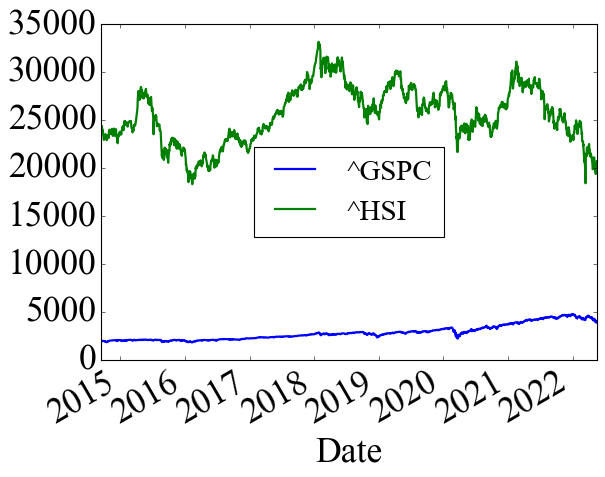

In [38]:
res_df.plot()
plt.show()

In [39]:
time_ser_1 = res_df[symbol_1]
time_ser_2 = res_df[symbol_2]

time_ser_1_for_graph = time_ser_1.copy()
time_ser_2_for_graph = time_ser_2.copy()

np.savetxt(f'{symbol_1}_cutted_time_series.txt', time_ser_1.values)
np.savetxt(f'{symbol_2}_cutted_time_series.txt', time_ser_2.values)

### Розрахунок та збереженяя ряду (логарифмічних) прибутковостей

In [11]:
log_ret_1 = (np.log(time_ser_1) - np.log(time_ser_1.shift(1))).dropna()
log_ret_1 -= log_ret_1.mean()
log_ret_1 /= log_ret_1.std()

pct_change_1 = time_ser_1.pct_change().dropna()
pct_change_1 -= pct_change_1.mean()
pct_change_1 /= pct_change_1.std()

log_ret_2 = (np.log(time_ser_2) - np.log(time_ser_2.shift(1))).dropna()
log_ret_2 -= log_ret_2.mean()
log_ret_2 /= log_ret_2.std()

pct_change_2 = time_ser_2.pct_change().dropna()
pct_change_2 -= pct_change_2.mean()
pct_change_2 /= pct_change_2.std()

np.savetxt(f'{symbol_1}_log_ret.txt', log_ret_1)
np.savetxt(f'{symbol_1}_pct_change.txt', pct_change_1)
np.savetxt(f'{symbol_2}_log_ret.txt', log_ret_2)
np.savetxt(f'{symbol_2}_pct_change.txt', pct_change_2)

### Виведення ряду (логарифмічних) прибутковостей

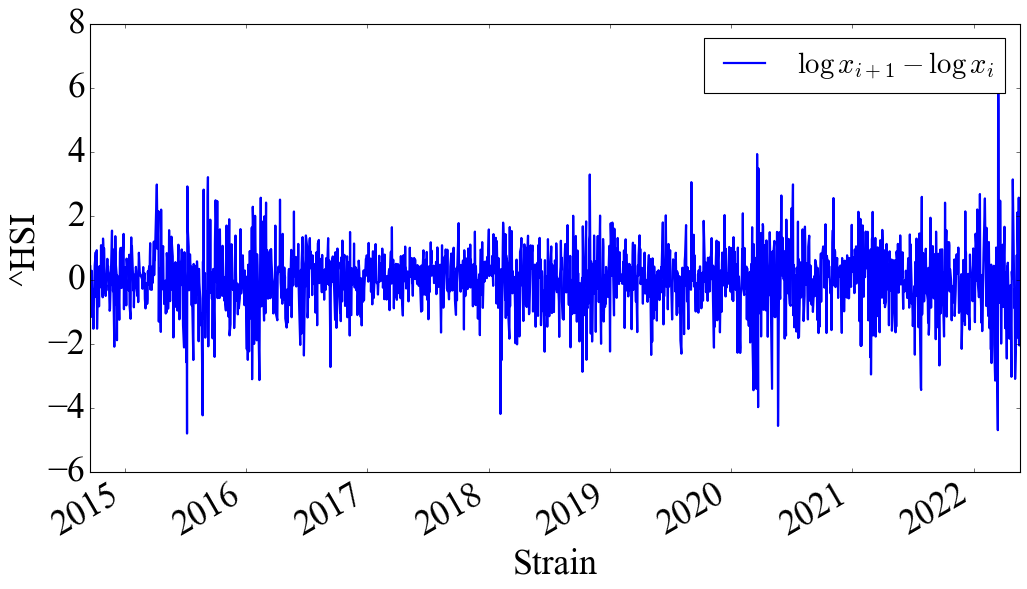

In [12]:
log_ret_1.plot(figsize=(15,8), xlabel='Strain', ylabel=fr"{symbol_1.split('.')[0]}", label=r"$\log{x_{i+1}} - \log{x_{i}}$")
plt.legend()
plt.savefig(f'{symbol_1}_log_ret.jpg', bbox_inches="tight")
plt.show()

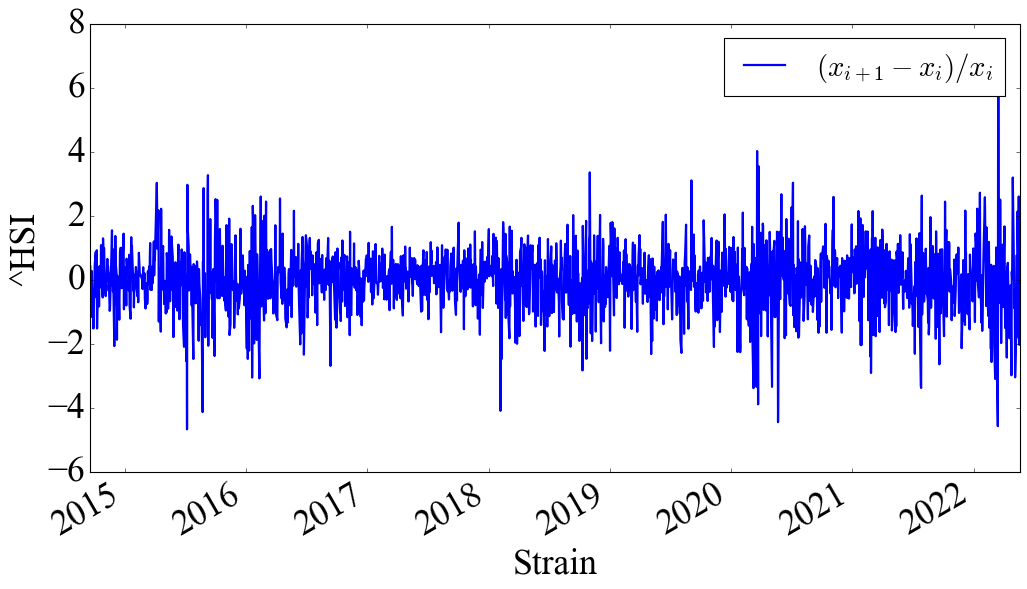

In [13]:
pct_change_1.plot(figsize=(15,8), xlabel='Strain', ylabel=fr"{symbol_1.split('.')[0]}", label=r"$(x_{i+1} - x_{i})/x_{i}$")
plt.legend()
plt.savefig(f'{symbol_1}_simple_ret.jpg', bbox_inches="tight")
plt.show()

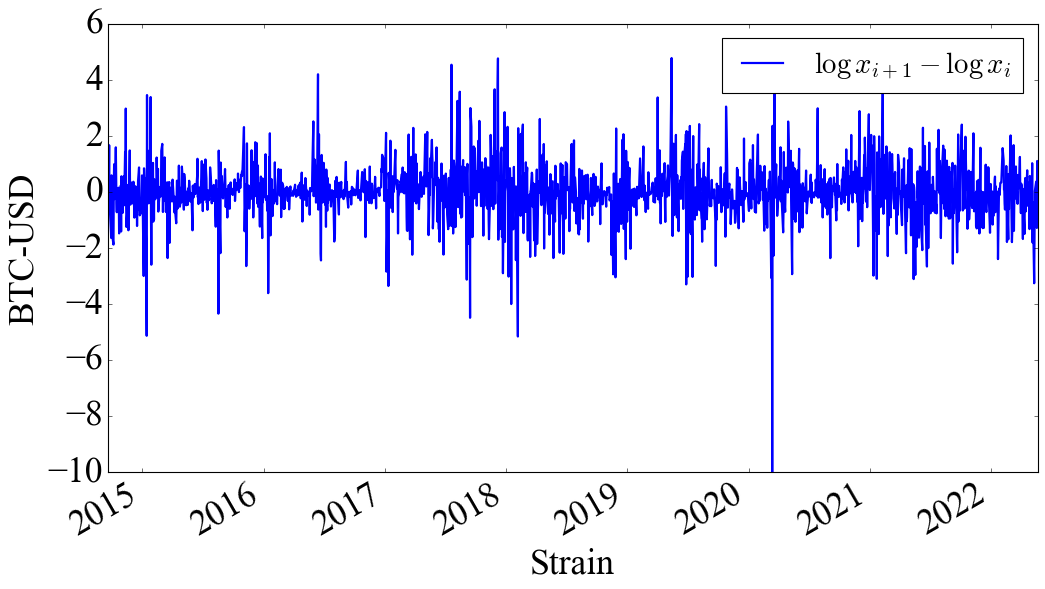

In [14]:
log_ret_2.plot(figsize=(15,8), xlabel='Strain', ylabel=fr"{symbol_2.split('.')[0]}", label=r"$\log{x_{i+1}} - \log{x_{i}}$")
plt.legend()
plt.savefig(f'{symbol_2}_log_ret.jpg', bbox_inches="tight")
plt.show()

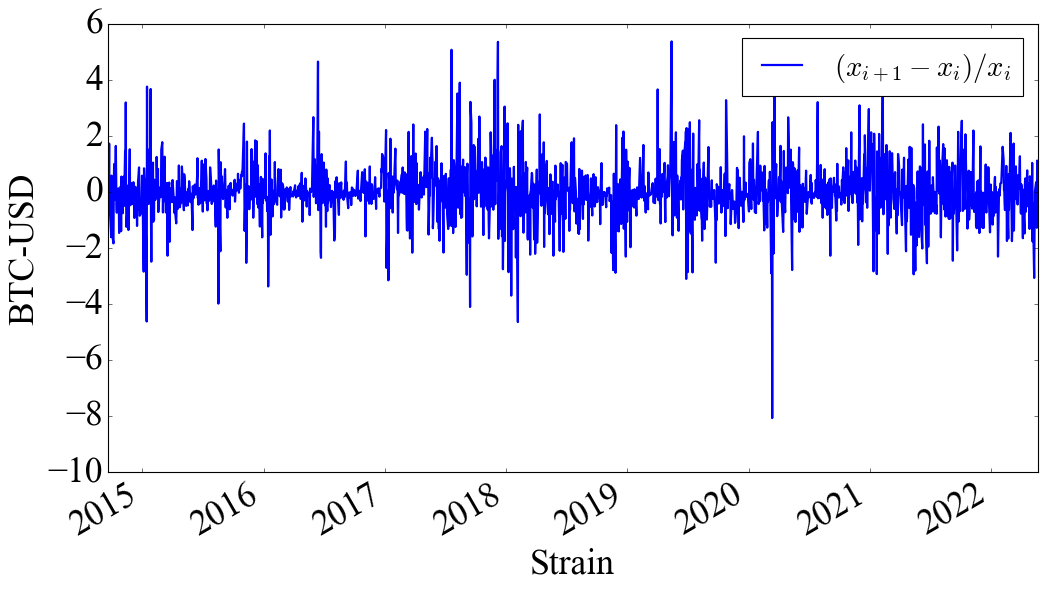

In [15]:
pct_change_2.plot(figsize=(15,8), xlabel='Strain', ylabel=fr"{symbol_2.split('.')[0]}", label=r"$(x_{i+1} - x_{i})/x_{i}$")
plt.legend()
plt.savefig(f'{symbol_2}_simple_ret.jpg', bbox_inches="tight")
plt.show()

### Виведення вихідних рядів

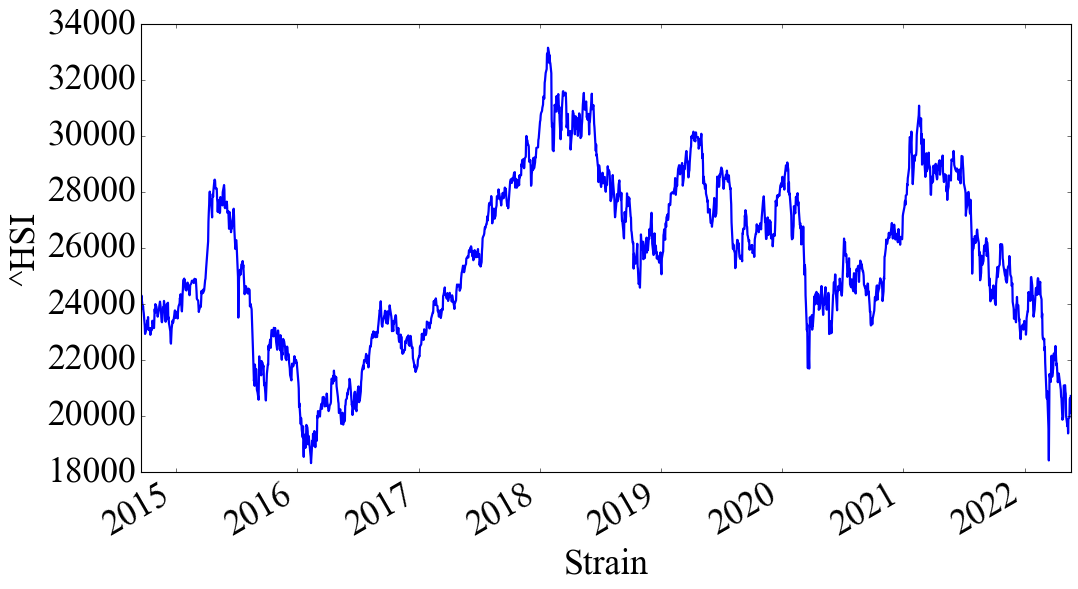

In [16]:
time_ser_1_for_graph.plot(figsize=(15,8), xlabel='Strain', ylabel=fr"{symbol_1.split('.')[0]}")
plt.savefig(f'{symbol_1}.jpg', bbox_inches="tight")
plt.show()

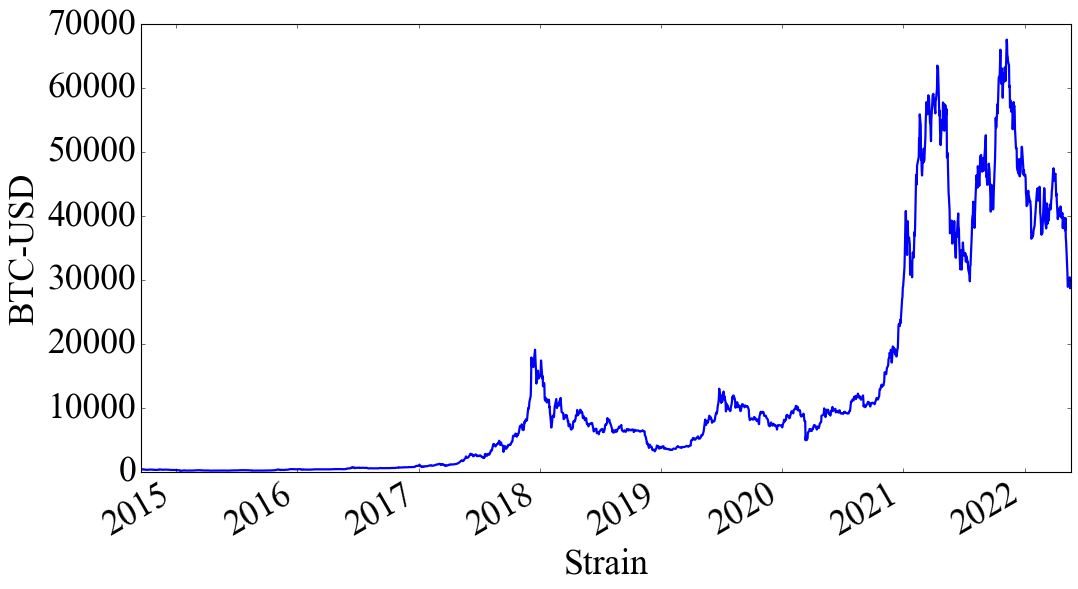

In [17]:
time_ser_2_for_graph.plot(figsize=(15,8), xlabel='Strain', ylabel=fr"{symbol_2.split('.')[0]}")
plt.savefig(f'{symbol_2}.jpg', bbox_inches="tight")
plt.show()

## DCCA

### For the whole time series

In [40]:
dcca_time_ser_1 = time_ser_1.copy()
dcca_time_ser_2 = time_ser_2.copy()

ret_type = 4 #вид ряду: 1 - вихідний, 2 - детрендований (різниця між теп. значенням та попереднім)
                        # 3 - прибутковості звичайні, 4 - стандартизовані прибутковості, 5 - абсолютні значення (волатильності)

if ret_type == 1:
    pass
elif ret_type == 2:
    dcca_time_ser_1 = dcca_time_ser_1.diff()
    dcca_time_ser_2 = dcca_time_ser_2.diff()
    
elif ret_type == 3:
    dcca_time_ser_1 = dcca_time_ser_1.pct_change()
    dcca_time_ser_2 = dcca_time_ser_2.pct_change()
    
elif ret_type == 4:
    dcca_time_ser_1 = dcca_time_ser_1.pct_change()
    dcca_time_ser_1 -= dcca_time_ser_1.mean()
    dcca_time_ser_1 /= dcca_time_ser_1.std()
    
    dcca_time_ser_2 = dcca_time_ser_2.pct_change()
    dcca_time_ser_2 -= dcca_time_ser_2.mean()
    dcca_time_ser_2 /= dcca_time_ser_2.std()
    
elif ret_type == 5: 
    dcca_time_ser_1 = dcca_time_ser_1.pct_change()
    dcca_time_ser_1 -= dcca_time_ser_1.mean()
    dcca_time_ser_1 /= dcca_time_ser_1.std()
    dcca_time_ser_1 = dcca_time_ser_1.abs()
    
    dcca_time_ser_1 = dcca_time_ser_1.pct_change()
    dcca_time_ser_1 -= dcca_time_ser_1.mean()
    dcca_time_ser_1 /= dcca_time_ser_1.std()
    dcca_time_ser_1 = dcca_time_ser_1.abs()

dcca_time_ser_1 = dcca_time_ser_1.dropna().values
dcca_time_ser_2 = dcca_time_ser_2.dropna().values

a = fu.toAggregated(dcca_time_ser_1)
b = fu.toAggregated(dcca_time_ser_2)

rev = True #Чи повторювати розрахунок ф-ції флуктуацій з кінця
order = 2

pydcca = fathon.DCCA(a, b)

win_beg = 10 #Початкова ширина сегменту
win_end = 1000 #Кінцева ширина сегменту

wins = fu.linRangeByStep(win_beg, win_end)

n, F = pydcca.computeFlucVec(wins, polOrd=order, revSeg=rev)
H, H_intercept = pydcca.fitFlucVec()

#compute rho index
n, rho = pydcca.computeRho(wins, polOrd=order, revSeg=rev)

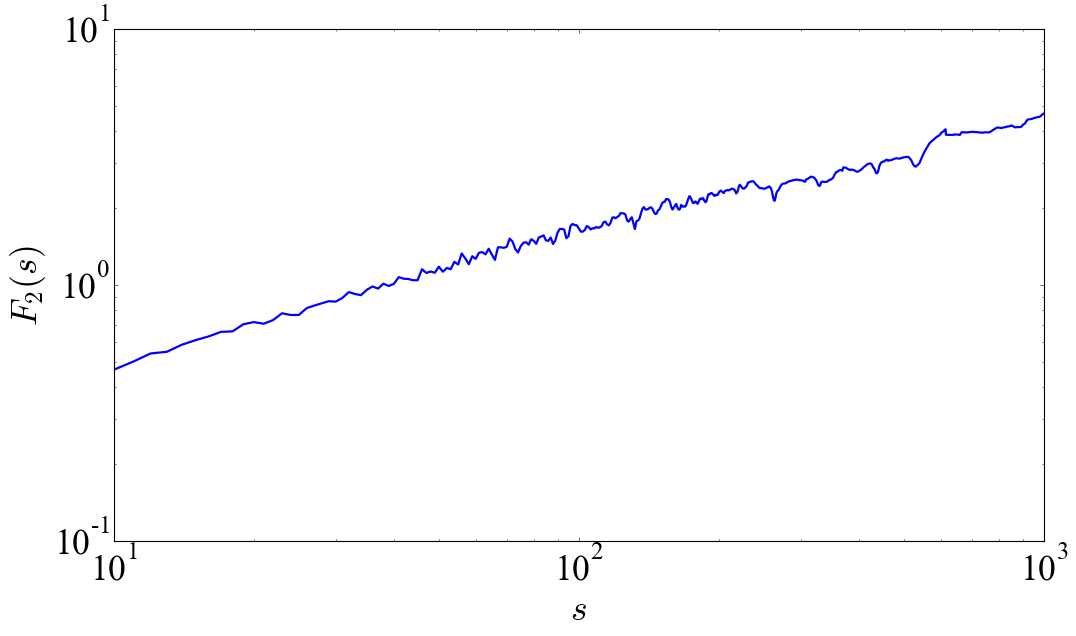

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.loglog(n, F)
ax.set_ylabel(r'$F_{2}(s)$')
ax.set_xlabel(r'$s$')
ax.set_xlim(win_beg, win_end)
plt.savefig(f"dссa_F_2_whole_time_series_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{ret_type}_{order}_{win_beg}_{win_end}.jpg", bbox_inches="tight")
plt.show()

np.savetxt(f"dссa_F_2_whole_time_series_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}__{ret_type}_{order}_{win_beg}_{win_end}.txt", F)

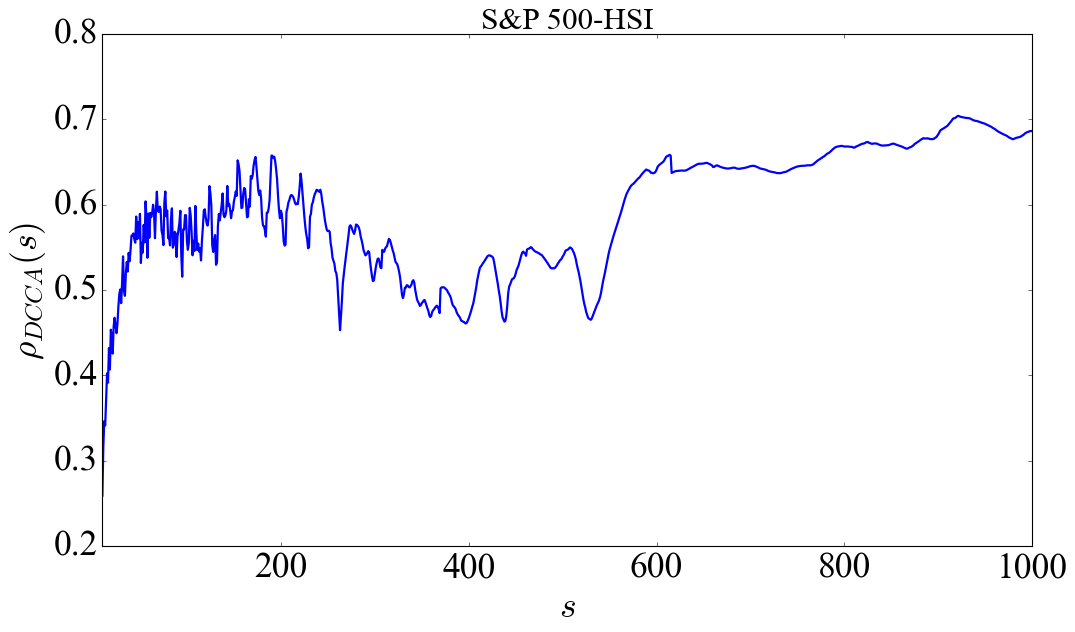

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(n, rho)
ax.set_ylabel(r'$\rho_{DCCA}(s)$')
ax.set_xlabel(r'$s$')
ax.set_xlim(win_beg, win_end)
ax.set_title("S&P 500-HSI", fontsize=28)
plt.savefig(f"dссa_rho_whole_time_series_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{ret_type}_{order}_{win_beg}_{win_end}.jpg", bbox_inches="tight")
plt.show()

np.savetxt(f"dссa_rho_whole_time_series_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}__{ret_type}_{order}_{win_beg}_{win_end}.txt", rho)

### In window

In [517]:
window = 250 #розмір вікна
tstep = 1 #крок вікна
ret_type = 4 #вид ряду: 1 - вихідний, 2 - детрендований (різниця між теп. значенням та попереднім)
                        # 3 - прибутковості звичайні, 4 - стандартизовані прибутковості, 5 - волатильності

rev = True #Чи повторювати розрахунок ф-ції флуктуацій з кінця
order = 2 #порядок

win_beg = 10 #Початкова ширина сегменту
win_end = window-1 #Кінцева ширина сегменту

length = len(time_ser_1)

rho_mean = []
rho_diff = []
rho_max = []
rho_first = []
rho_middle = []
rho_last = []
h_corr = []
D_f_corr = []

In [518]:
for i in range(0,length-window,tstep):
    fragm_1 = time_ser_1.iloc[i:i+window] #відбираємо фрагмент та в подальшому відбираємо потрібний тип ряду
    fragm_2 = time_ser_2.iloc[i:i+window]
    if ret_type == 1:
        pass
    
    elif ret_type == 2:
        fragm_1 = fragm_1.diff()
        fragm_2 = fragm_2.diff()
        
    elif ret_type == 3:
        fragm_1 = fragm_1.pct_change()
        fragm_2 = fragm_2.pct_change()
        
    elif ret_type == 4:
        fragm_1 = fragm_1.pct_change()
        fragm_1 -= fragm_1.mean()
        fragm_1 /= fragm_1.std()
        
        fragm_2 = fragm_2.pct_change()
        fragm_2 -= fragm_2.mean()
        fragm_2 /= fragm_2.std()
        
    elif ret_type == 5:
        fragm_1 = fragm_1.pct_change()
        fragm_1 -= fragm_1.mean()
        fragm_1 /= fragm_1.std()
        fragm_1 = fragm_1.abs()
        
        fragm_2 = fragm_2.pct_change()
        fragm_2 -= fragm_2.mean()
        fragm_2 /= fragm_2.std()
        fragm_2 = fragm_2.abs()
        
    fragm_1 = fragm_1.dropna().values
    fragm_2 = fragm_2.dropna().values
    
    a = fu.toAggregated(fragm_1)
    b = fu.toAggregated(fragm_2)
    
    pydcca = fathon.DCCA(a, b)

    wins = fu.linRangeByStep(win_beg, win_end-1)

    n, F = pydcca.computeFlucVec(wins, polOrd=order)
    H, H_intercept = pydcca.fitFlucVec()
    D = 2. - H

    #compute rho index
    n, rho = pydcca.computeRho(wins, polOrd=order, revSeg=rev)
    
    diff = rho.max() - rho.min()
    mean = np.mean(rho)
    maximal = max(rho)
    middleIdx = np.argwhere(rho == np.percentile(rho, 50, interpolation='nearest'))
    r_first = rho[0]
    r_middle = rho[middleIdx][0][0]
    r_last = rho[-1]
    
    rho_diff.append(diff)
    rho_mean.append(mean)
    rho_max.append(maximal)
    rho_first.append(r_first)
    rho_middle.append(r_middle)
    rho_last.append(r_last)
    
    h_corr.append(H)
    D_f_corr.append(D)

In [519]:
np.savetxt(f"dcca_rho_first_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{window}_{tstep}_{ret_type}_{order}_{win_beg}_{win_end}.txt", rho_first)
np.savetxt(f"dcca_rho_middle_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{window}_{tstep}_{ret_type}_{order}_{win_beg}_{win_end}.txt", rho_middle)
np.savetxt(f"dcca_rho_last_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{window}_{tstep}_{ret_type}_{order}_{win_beg}_{win_end}.txt", rho_last)
np.savetxt(f"dcca_rho_diff_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{window}_{tstep}_{ret_type}_{order}_{win_beg}_{win_end}.txt", rho_diff)
np.savetxt(f"dcca_rho_mean_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{window}_{tstep}_{ret_type}_{order}_{win_beg}_{win_end}.txt", rho_mean)
np.savetxt(f"dcca_rho_max_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{window}_{tstep}_{ret_type}_{order}_{win_beg}_{win_end}.txt", rho_max)
np.savetxt(f"dcca_h_corr_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{window}_{tstep}_{ret_type}_{order}_{win_beg}_{win_end}.txt", h_corr)
np.savetxt(f"dcca_D_f_corr_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{window}_{tstep}_{ret_type}_{order}_{win_beg}_{win_end}.txt", D_f_corr)

In [520]:
rho_diff = np.asarray(rho_diff).reshape(-1, 1) 
rho_mean = np.asarray(rho_mean).reshape(-1, 1)
rho_max = np.asarray(rho_max).reshape(-1, 1)
rho_first = np.asarray(rho_first).reshape(-1, 1)
rho_middle = np.asarray(rho_middle).reshape(-1, 1)
rho_last = np.asarray(rho_last).reshape(-1, 1)
h_corr = np.asarray(h_corr).reshape(-1, 1)
D_f_corr = np.asarray(D_f_corr).reshape(-1, 1)

min_max_scaler = preprocessing.MinMaxScaler()

scaled_rho_diff = min_max_scaler.fit_transform(rho_diff)
scaled_rho_mean = min_max_scaler.fit_transform(rho_mean)
scaled_rho_max = min_max_scaler.fit_transform(rho_max)
scaled_rho_first = min_max_scaler.fit_transform(rho_first)
scaled_rho_middle = min_max_scaler.fit_transform(rho_middle)
scaled_rho_last = min_max_scaler.fit_transform(rho_last)
scaled_h_corr = min_max_scaler.fit_transform(h_corr)
scaled_D_f_corr = min_max_scaler.fit_transform(D_f_corr)

scaled_for_graph_1 = min_max_scaler.fit_transform(time_ser_1_for_graph.values.reshape(-1, 1)) #нормалізуємо
scaled_for_graph_2 = min_max_scaler.fit_transform(time_ser_2_for_graph.values.reshape(-1, 1)) #нормалізуємо

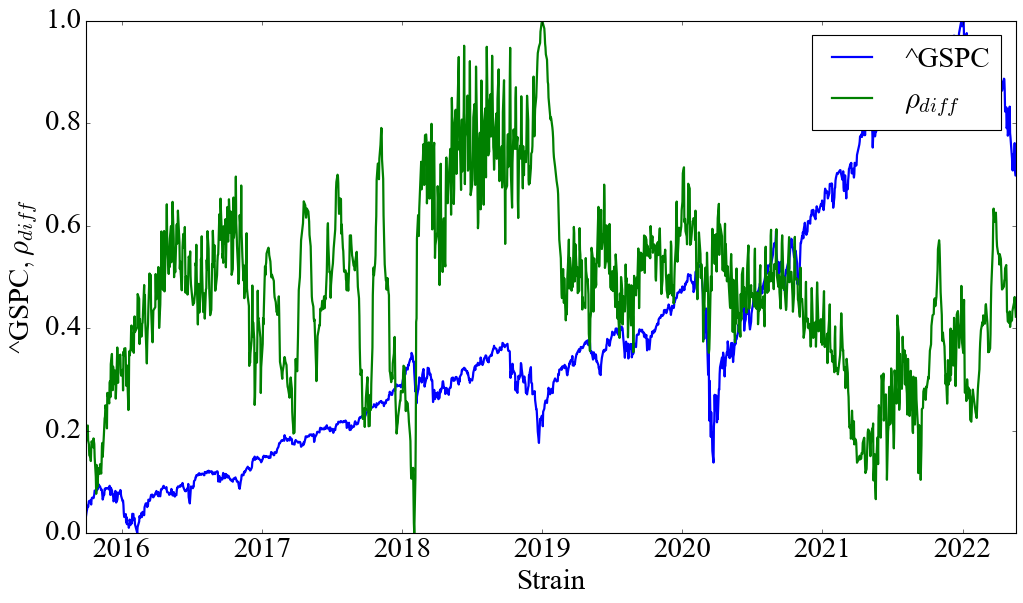

In [521]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_1.index[window:length:tstep], scaled_for_graph_1[window:length:tstep], label=fr"{symbol_1_for_graph.split('.')[0]}")
ax.plot(time_ser_1.index[window:length:tstep], scaled_rho_diff, label=r"$\rho_{diff}$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_1_for_graph.split('.')[0]}$,$" + r"$\rho_{diff}$")

plt.savefig(f"dcca_rho_diff_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{window}_{tstep}.jpg", bbox_inches="tight")

plt.show()

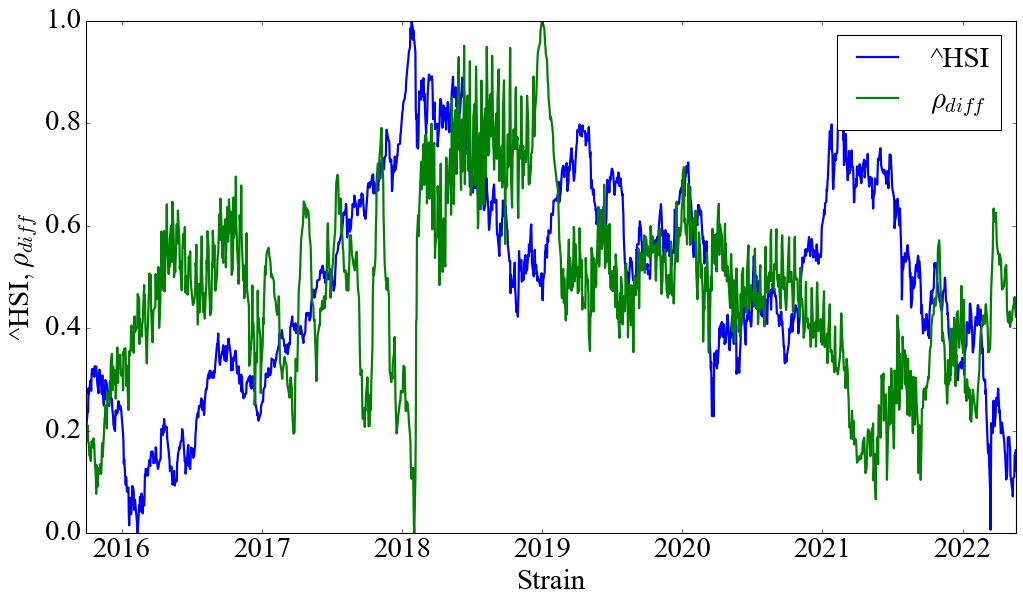

In [522]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_2.index[window:length:tstep], scaled_for_graph_2[window:length:tstep], label=fr"{symbol_2_for_graph.split('.')[0]}")
ax.plot(time_ser_2.index[window:length:tstep], scaled_rho_diff, label=r"$\rho_{diff}$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_2_for_graph.split('.')[0]}$,$" + r"$\rho_{diff}$")

plt.savefig(f"dcca_rho_diff_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{window}_{tstep}.jpg", bbox_inches="tight")

plt.show()

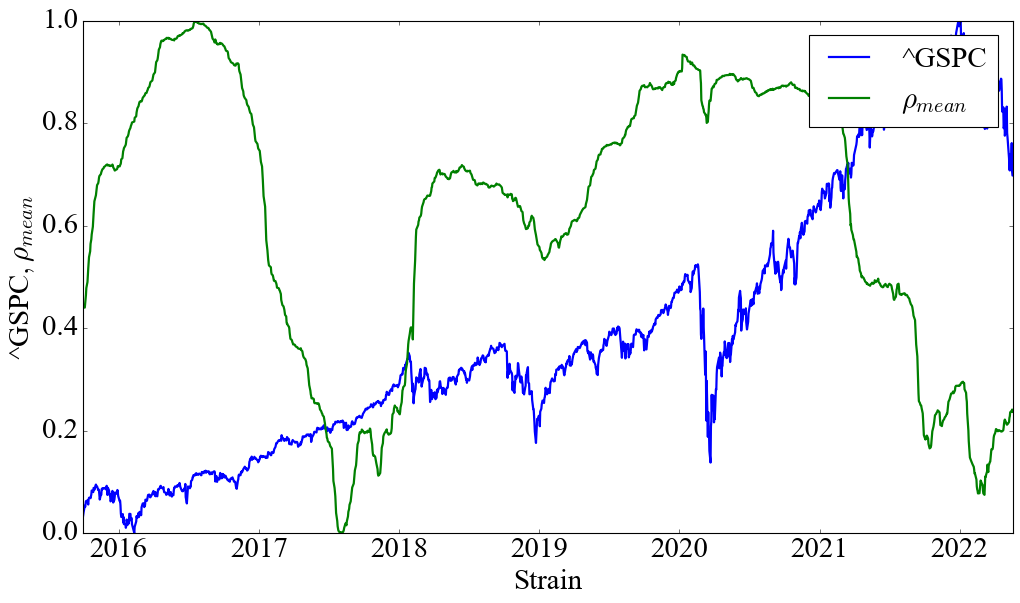

In [523]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_1.index[window:length:tstep], scaled_for_graph_1[window:length:tstep], label=fr"{symbol_1_for_graph.split('.')[0]}")
ax.plot(time_ser_1.index[window:length:tstep], scaled_rho_mean, label=r"$\rho_{mean}$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_1_for_graph.split('.')[0]}$,$" + r"$\rho_{mean}$")

plt.savefig(f"dcca_rho_mean_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{window}_{tstep}.jpg", bbox_inches="tight")

plt.show()

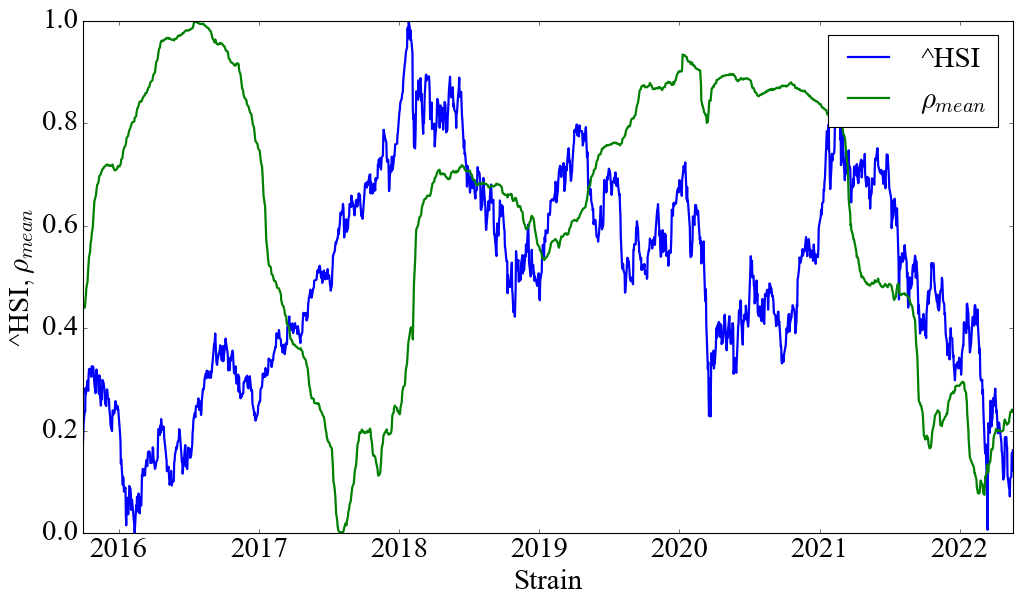

In [524]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_2.index[window:length:tstep], scaled_for_graph_2[window:length:tstep], label=fr"{symbol_2_for_graph.split('.')[0]}")
ax.plot(time_ser_2.index[window:length:tstep], scaled_rho_mean, label=r"$\rho_{mean}$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_2_for_graph.split('.')[0]}$,$" + r"$\rho_{mean}$")

plt.savefig(f"dcca_rho_mean_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{window}_{tstep}.jpg", bbox_inches="tight")

plt.show()

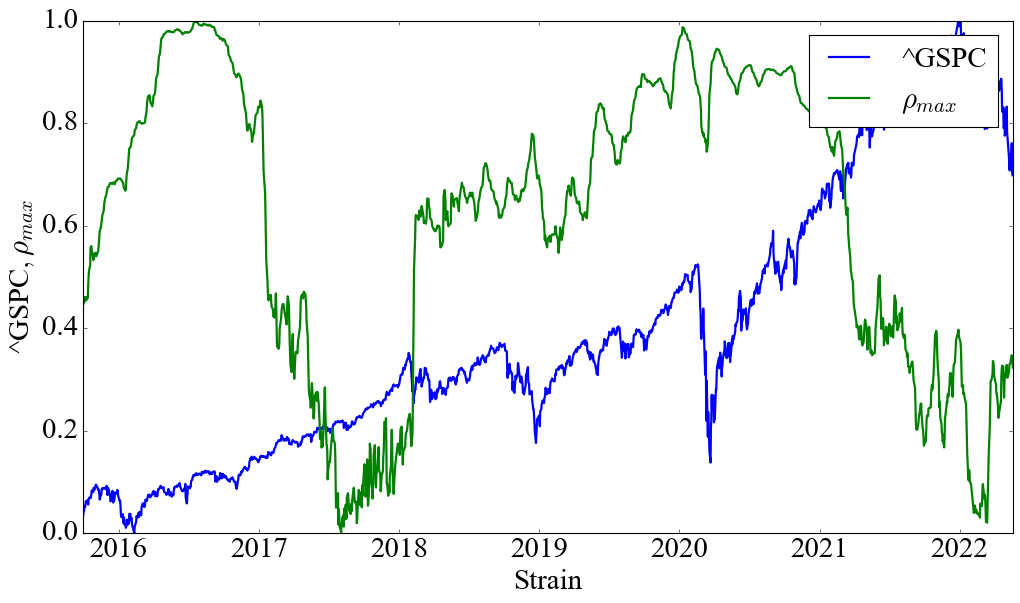

In [525]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_1.index[window:length:tstep], scaled_for_graph_1[window:length:tstep], label=fr"{symbol_1_for_graph.split('.')[0]}")
ax.plot(time_ser_1.index[window:length:tstep], scaled_rho_max, label=r"$\rho_{max}$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_1_for_graph.split('.')[0]}$,$" + r"$\rho_{max}$")

plt.savefig(f"dcca_rho_max_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{window}_{tstep}.jpg", bbox_inches="tight")

plt.show()

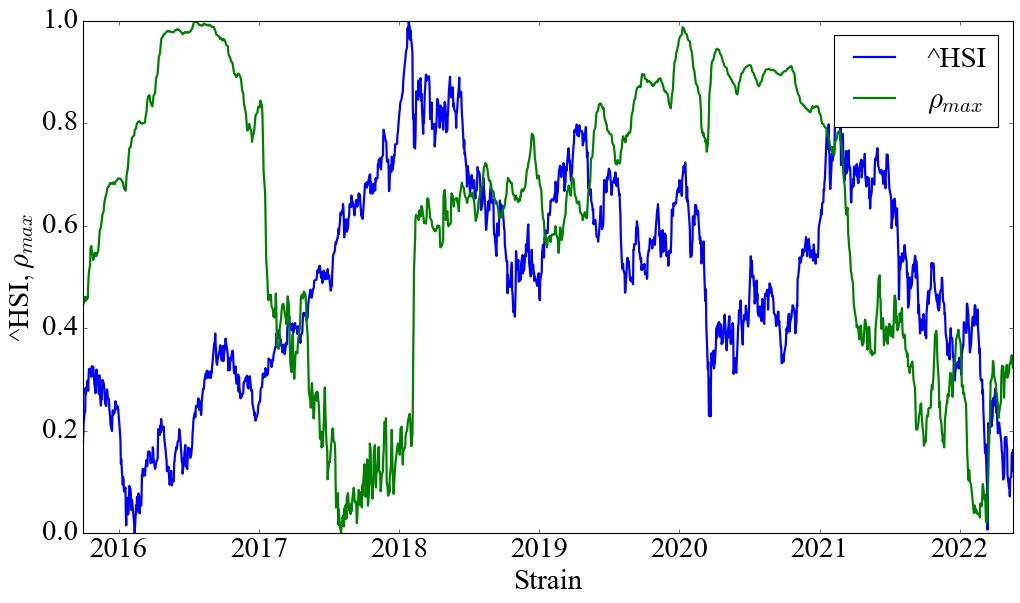

In [526]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_2.index[window:length:tstep], scaled_for_graph_2[window:length:tstep], label=fr"{symbol_2_for_graph.split('.')[0]}")
ax.plot(time_ser_2.index[window:length:tstep], scaled_rho_max, label=r"$\rho_{max}$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_2_for_graph.split('.')[0]}$,$" + r"$\rho_{max}$")

plt.savefig(f"dcca_rho_max_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{window}_{tstep}.jpg", bbox_inches="tight")

plt.show()

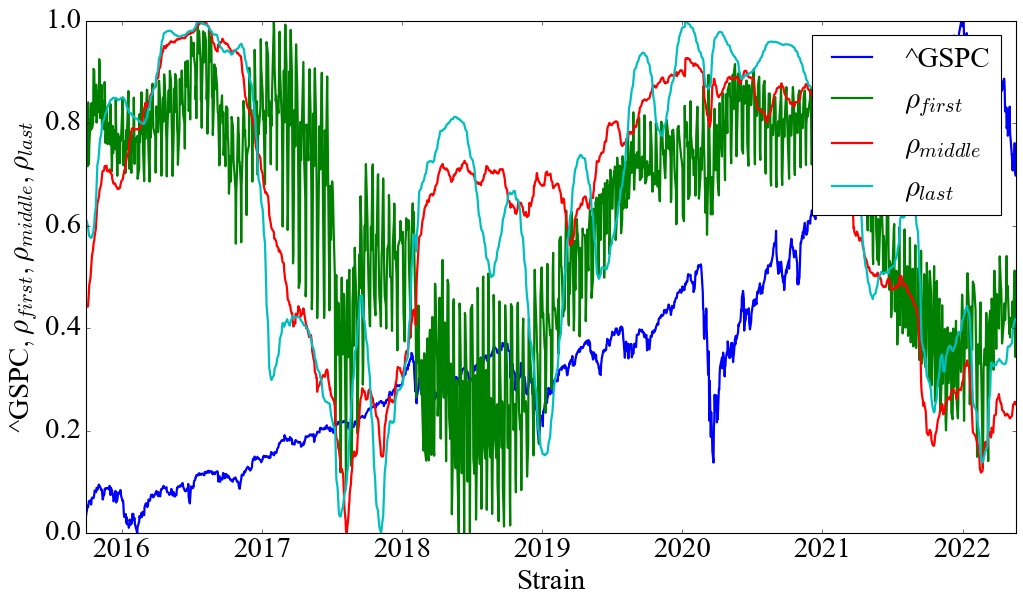

In [527]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_1.index[window:length:tstep], scaled_for_graph_1[window:length:tstep], label=fr"{symbol_1_for_graph.split('.')[0]}")
ax.plot(time_ser_1.index[window:length:tstep], scaled_rho_first, label=r"$\rho_{first}$")
ax.plot(time_ser_1.index[window:length:tstep], scaled_rho_middle, label=r"$\rho_{middle}$")
ax.plot(time_ser_1.index[window:length:tstep], scaled_rho_last, label=r"$\rho_{last}$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_1_for_graph.split('.')[0]}$,$" + r"$\rho_{first}, \rho_{middle}, \rho_{last}$")

plt.savefig(f"dcca_rho_first_middle_last_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{window}_{tstep}.jpg", bbox_inches="tight")

plt.show()

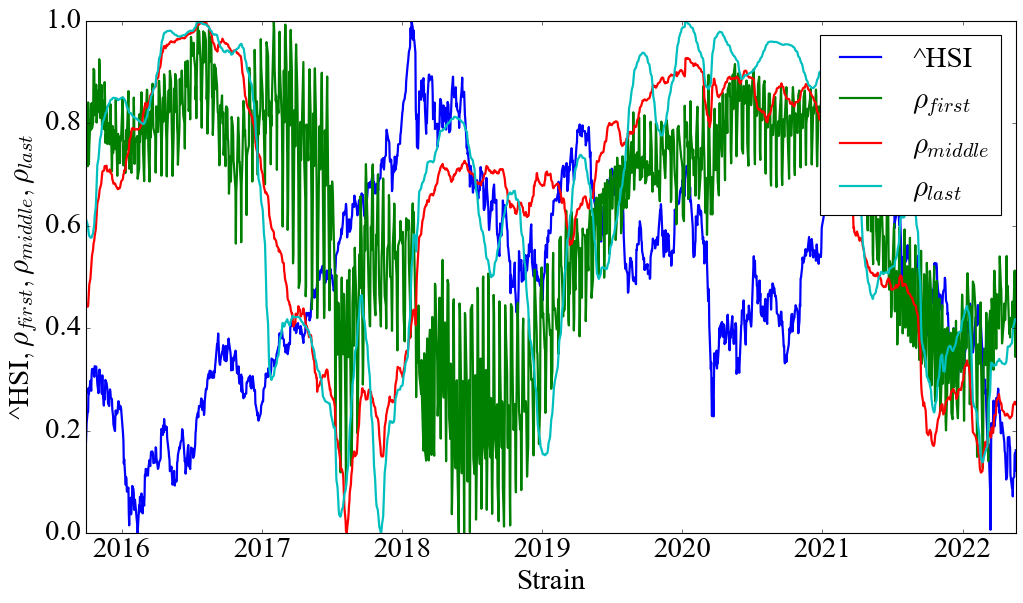

In [528]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_2.index[window:length:tstep], scaled_for_graph_2[window:length:tstep], label=fr"{symbol_2_for_graph.split('.')[0]}")
ax.plot(time_ser_2.index[window:length:tstep], scaled_rho_first, label=r"$\rho_{first}$")
ax.plot(time_ser_2.index[window:length:tstep], scaled_rho_middle, label=r"$\rho_{middle}$")
ax.plot(time_ser_2.index[window:length:tstep], scaled_rho_last, label=r"$\rho_{last}$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_2_for_graph.split('.')[0]}$,$" + r"$\rho_{first}, \rho_{middle}, \rho_{last}$")

plt.savefig(f"dcca_rho_first_middle_last_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{window}_{tstep}.jpg", bbox_inches="tight")

plt.show()

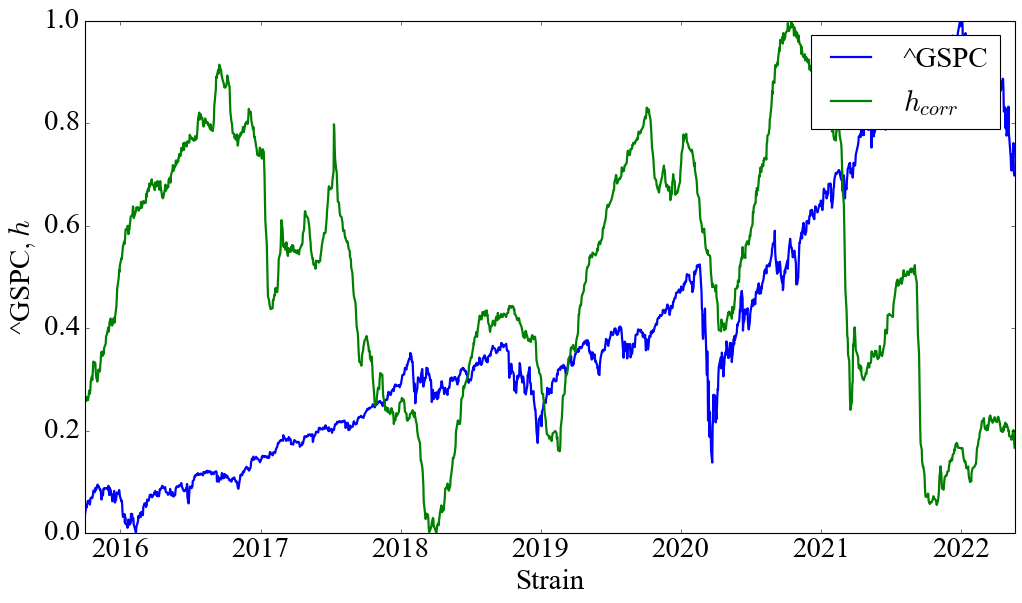

In [529]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(time_ser_1.index[window:length:tstep], scaled_for_graph_1[window:length:tstep], label=fr"{symbol_1_for_graph.split('.')[0]}")
ax.plot(time_ser_1.index[window:length:tstep], scaled_h_corr, label=r"$h_{corr}$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_1_for_graph.split('.')[0]}$,$" + r"$h$")

plt.savefig(f"dcca_h_corr_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{window}_{tstep}.jpg", bbox_inches="tight")

plt.show()

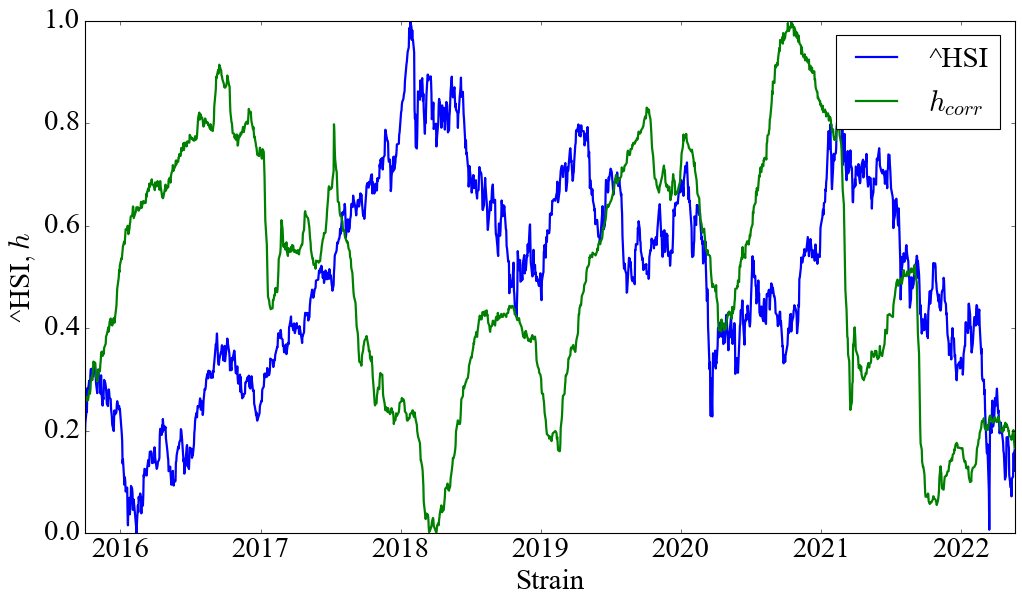

In [530]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_2.index[window:length:tstep], scaled_for_graph_2[window:length:tstep], label=fr"{symbol_2_for_graph.split('.')[0]}")
ax.plot(time_ser_2.index[window:length:tstep], scaled_h_corr, label=r"$h_{corr}$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_2_for_graph.split('.')[0]}$,$" + r"$h$")

plt.savefig(f"dcca_h_corr_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{window}_{tstep}.jpg", bbox_inches="tight")

plt.show()

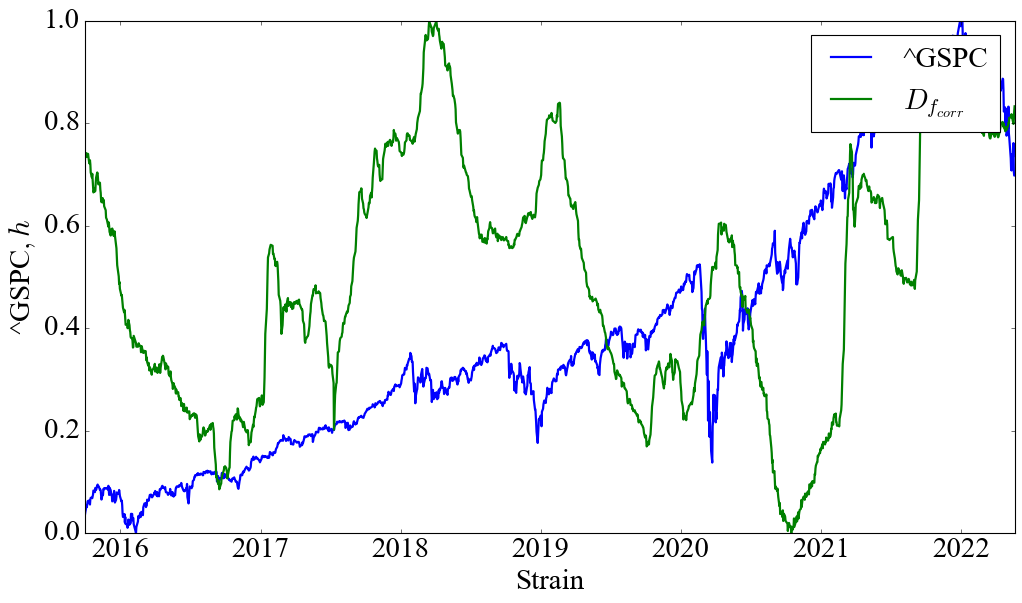

In [531]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_1.index[window:length:tstep], scaled_for_graph_1[window:length:tstep], label=fr"{symbol_1_for_graph.split('.')[0]}")
ax.plot(time_ser_1.index[window:length:tstep], scaled_D_f_corr, label=r"$D_{f_{corr}}$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_1_for_graph.split('.')[0]}$,$" + r"$h$")

plt.savefig(f"dcca_d_f_corr_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{window}_{tstep}.jpg", bbox_inches="tight")

plt.show()

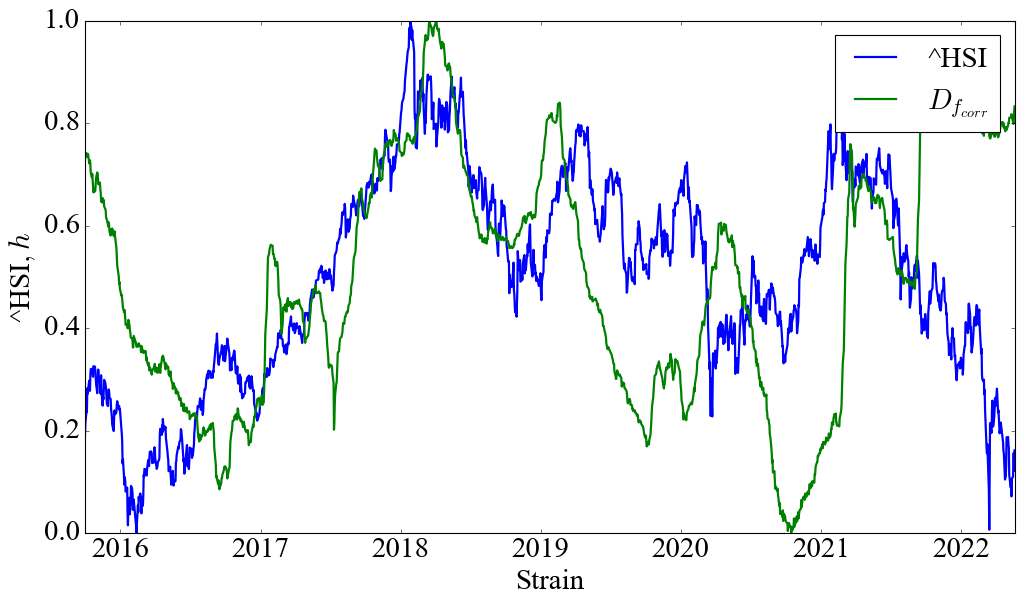

In [532]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_2.index[window:length:tstep], scaled_for_graph_2[window:length:tstep], label=fr"{symbol_2_for_graph.split('.')[0]}")
ax.plot(time_ser_2.index[window:length:tstep], scaled_D_f_corr, label=r"$D_{f_{corr}}$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_2_for_graph.split('.')[0]}$,$" + r"$h$")

plt.savefig(f"dcca_d_f_corr_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{window}_{tstep}.jpg", bbox_inches="tight")

plt.show()

## MF-DCCA

### For the whole series

In [84]:
mfdcca_time_ser_1 = time_ser_1.copy()
mfdcca_time_ser_2 = time_ser_2.copy()

ret_type = 4 #вид ряду: 1 - вихідний, 2 - детрендований (різниця між теп. значенням та попереднім)
                        # 3 - прибутковості звичайні, 4 - стандартизовані прибутковості, 5 - абсолютні значення (волатильності)

if ret_type == 1:
    pass
elif ret_type == 2:
    mfdcca_time_ser_1 = mfdcca_time_ser_1.diff()
    mfdcca_time_ser_2 = mfdcca_time_ser_2.diff()
elif ret_type == 3:
    mfdcca_time_ser_1 = mfdcca_time_ser_1.pct_change()
    mfdcca_time_ser_2 = mfdcca_time_ser_2.pct_change()
elif ret_type == 4:
    mfdcca_time_ser_1 = mfdcca_time_ser_1.pct_change()
    mfdcca_time_ser_1 -= mfdcca_time_ser_1.mean()
    mfdcca_time_ser_1 /= mfdcca_time_ser_1.std()
    
    mfdcca_time_ser_2 = mfdcca_time_ser_2.pct_change()
    mfdcca_time_ser_2 -= mfdcca_time_ser_2.mean()
    mfdcca_time_ser_2 /= mfdcca_time_ser_2.std()    
elif ret_type == 5: 
    mfdcca_time_ser_1 = mfdcca_time_ser_1.pct_change()
    mfdcca_time_ser_1 -= mfdcca_time_ser_1.mean()
    mfdcca_time_ser_1 /= mfdcca_time_ser_1.std()
    mfdcca_time_ser_1 = mfdcca_time_ser_1.abs()
    
    mfdcca_time_ser_2 = mfdcca_time_ser_2.pct_change()
    mfdcca_time_ser_2 -= mfdcca_time_ser_2.mean()
    mfdcca_time_ser_2 /= mfdcca_time_ser_2.std()
    mfdcca_time_ser_2 = mfdcca_time_ser_2.abs()

mfdcca_time_ser_1 = mfdcca_time_ser_1.dropna().values
mfdcca_time_ser_2 = mfdcca_time_ser_2.dropna().values

a = fu.toAggregated(mfdcca_time_ser_1)
b = fu.toAggregated(mfdcca_time_ser_2)

#initialize mfdcca object
pymfdcca = fathon.MFDCCA(a, b)

#compute fluctuation function and generalized Hurst exponents

rev = True #Чи повторювати розрахунок ф-ції флуктуацій з кінця

win_beg = 10 #Початкова ширина сегменту
win_end = 1000 #Кінцева ширина сегменту
wins = fu.linRangeByStep(win_beg, win_end)

q_min = -5 #мінімальне значення q
q_max = 5 #максимальне значення q
q_inc = 0.1 #крок збільшення q

q = np.arange(q_min, q_max+q_inc, q_inc)
q = np.round_(q, decimals = 1)

order = 2 #порядок 

n, F = pymfdcca.computeFlucVec(wins, q, revSeg=rev, polOrd=order)
list_H, list_H_intercept = pymfdcca.fitFlucVec()

#compute mass exponents
tau = pymfdcca.computeMassExponents()

#compute multifractal spectrum
alpha, mfSpect = pymfdcca.computeMultifractalSpectrum()

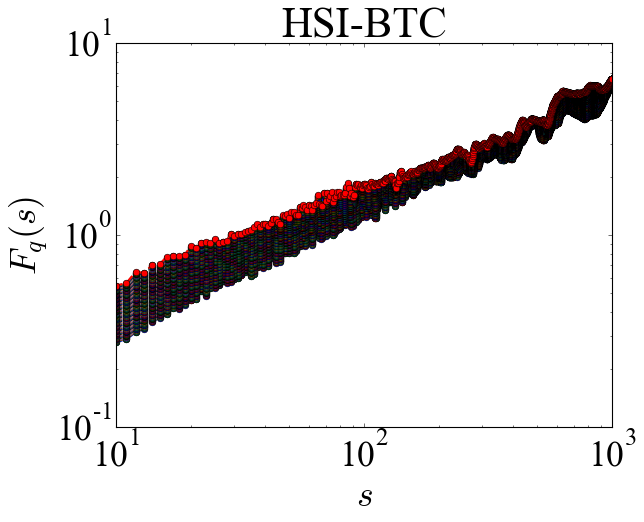

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in range(F.shape[0]):
    ax.loglog(n, F[i, :], marker='o', linestyle='dashed')
ax.set_ylabel(r'$F_{q}(s)$')
ax.set_xlabel(r'$s$')
ax.set_xlim(win_beg, win_end)
ax.set_title("HSI-BTC")

plt.savefig(f"mfdcca_F_q_whole_time_series_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{ret_type}_{order}_{q_min}_{q_max}_{q_inc}_{win_beg}_{win_end}.jpg", bbox_inches="tight")
plt.show()

np.savetxt(f"mfdcca_F_q_whole_time_series_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{ret_type}_{order}_{q_min}_{q_max}_{q_inc}_{win_beg}_{win_end}.txt", F)

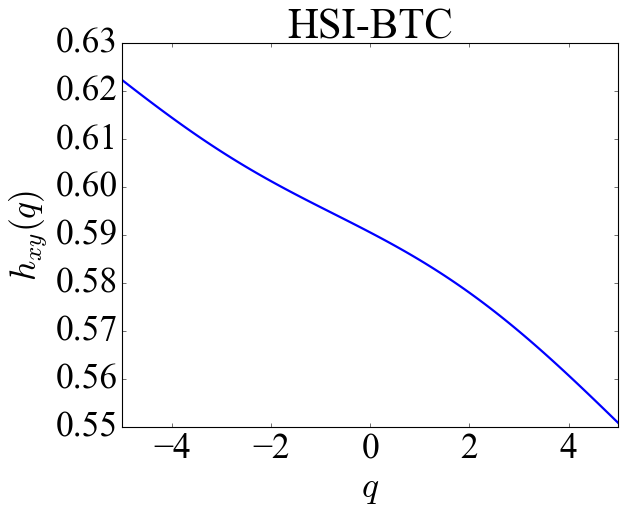

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(q, list_H)
ax.set_ylabel(r'$h_{xy}(q)$')
ax.set_xlabel(r'$q$')
ax.set_xlim(q_min, q_max)
ax.set_title("HSI-BTC")

plt.savefig(f"mfdcca_h_q_whole_time_series_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{ret_type}_{order}_{q_min}_{q_max}_{q_inc}_{win_beg}_{win_end}.jpg", bbox_inches="tight")
plt.show()

np.savetxt(f"mfdcca_h_q_whole_time_series_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{ret_type}_{order}_{q_min}_{q_max}_{q_inc}_{win_beg}_{win_end}.txt", list_H)
np.savetxt(f"mfdcca_q_whole_time_series_{symbol_1.split('.')[0]}_{symbol_1.split('.')[0]}_{ret_type}_{order}_{q_min}_{q_max}_{q_inc}_{win_beg}_{win_end}.txt", q)

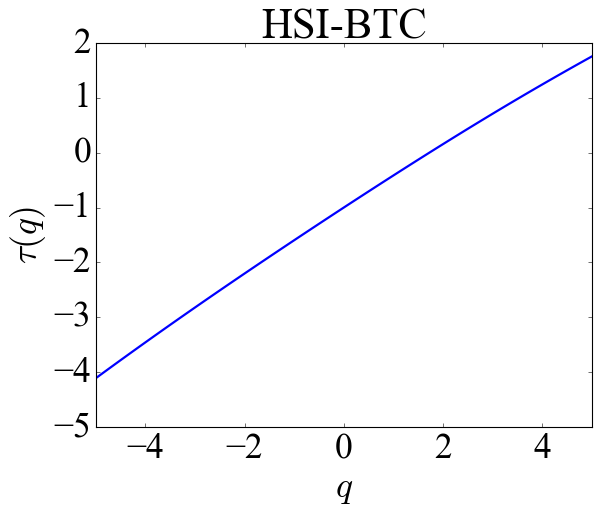

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(q, tau)
ax.set_ylabel(r'$\tau(q)$')
ax.set_xlabel(r'$q$')
ax.set_xlim(q_min, q_max)
ax.set_title("HSI-BTC")

plt.savefig(f"mfdcca_tau_q_whole_time_series_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{ret_type}_{order}_{q_min}_{q_max}_{q_inc}_{win_beg}_{win_end}.jpg", bbox_inches="tight")
plt.show()

np.savetxt(f"mfdcca_tau_q_whole_time_series_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{win_beg}_{win_end}.txt", tau)
np.savetxt(f"mfdcca_q_whole_time_series_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{ret_type}_{order}_{q_min}_{q_max}_{q_inc}_{win_beg}_{win_end}.txt", q)

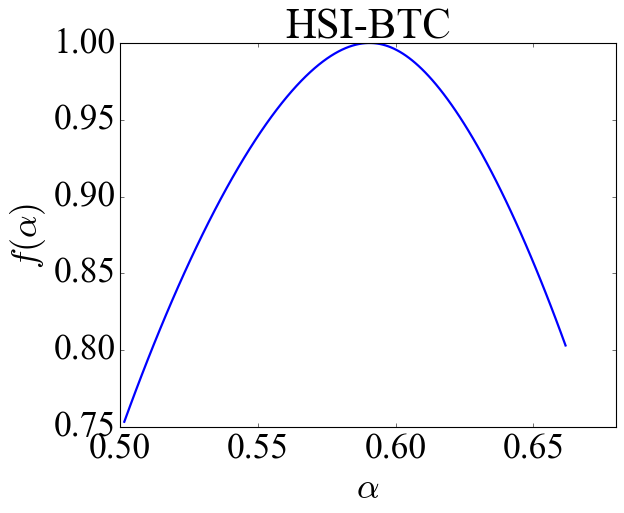

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(alpha, mfSpect)
ax.set_ylabel(r'$f(\alpha)$')
ax.set_xlabel(r'$\alpha$')
ax.set_title("HSI-BTC")
#ax.xticklabels.labelpad = 20

plt.savefig(f"mfdcca_f_alpha_whole_time_series_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{ret_type}_{order}_{q_min}_{q_max}_{q_inc}_{win_beg}_{win_end}.jpg", bbox_inches="tight")
plt.show()

np.savetxt(f"mfdcca_f_alpha_whole_time_series_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{ret_type}_{order}_{q_min}_{q_max}_{q_inc}_{win_beg}_{win_end}.txt", mfSpect)
np.savetxt(f"mfdcca_alpha_whole_time_series_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{ret_type}_{order}_{q_min}_{q_max}_{q_inc}_{win_beg}_{win_end}.txt", alpha)

### In window

In [538]:
window = 250 #розмір вікна
tstep = 1 #крок вікна
ret_type = 4 #вид ряду: 1 - вихідний, 2 - детрендований (різниця між теп. значенням та попереднім)
                        # 3 - прибутковості звичайні, 4 - стандартизовані прибутковості, 5 - абсолютні значення (волатильності)

rev = True #Чи повторювати розрахунок ф-ції флуктуацій з кінця
q_min = -5 #мінімальне значення q
q_max = 5 #максимальне значення q
q_inc = 0.1 #крок збільшення q

win_beg = 10 #Початкова ширина сегменту 
win_end = window-1 #Кінцева ширина сегменту

length = len(time_ser_1)

q = np.arange(q_min, q_max, q_inc)
q = np.round_(q, decimals = 1)


order = 2 #порядок 

delta_alph = []
delta_spec = []
max_alph = []
min_alph = []
mean_alph = []
alpha_zero = []
delta_alph_right = []
delta_alph_left = []
assym = []
delta_s = []
q_sens_values = []

In [539]:
for i in range(0,length-window,tstep):
    fragm_1 = time_ser_1.iloc[i:i+window] #відбираємо фрагмент та в подальшому відбираємо потрібний тип ряду
    fragm_2 = time_ser_2.iloc[i:i+window]
    
    if ret_type == 1:
        pass
    
    elif ret_type == 2:
        fragm_1 = fragm_1.diff()
        fragm_2 = fragm_2.diff()
        
    elif ret_type == 3:
        fragm_1 = fragm_1.pct_change()
        fragm_2 = fragm_2.pct_change()
        
    elif ret_type == 4:
        fragm_1 = fragm_1.pct_change()
        fragm_1 -= fragm_1.mean()
        fragm_1 /= fragm_1.std()
        
        fragm_2 = fragm_2.pct_change()
        fragm_2 -= fragm_2.mean()
        fragm_2 /= fragm_2.std()
        
    elif ret_type == 5:
        fragm_1 = fragm_1.pct_change()
        fragm_1 -= fragm_1.mean()
        fragm_1 /= fragm_1.std()
        fragm_1 = fragm_1.abs()
        
        fragm_2 = fragm_2.pct_change()
        fragm_2 -= fragm_2.mean()
        fragm_2 /= fragm_2.std()
        fragm_2 = fragm_2.abs()
        
    fragm_1 = fragm_1.dropna().values
    fragm_2 = fragm_2.dropna().values
    
    a = fu.toAggregated(fragm_1)
    b = fu.toAggregated(fragm_2)
    
    pymfdcca = fathon.MFDCCA(a, b)

    wins = fu.linRangeByStep(win_beg, win_end)

    n, F = pymfdcca.computeFlucVec(wins, q, revSeg=rev, polOrd=order)
    list_H, list_H_intercept = pymfdcca.fitFlucVec()

    #compute mass exponents
    tau = pymfdcca.computeMassExponents()

    #compute multifractal spectrum
    alpha, mfSpect = pymfdcca.computeMultifractalSpectrum()
    mfSpect = mfSpect[::-1]
    
    delta_alpha = alpha.max() - alpha.min()
    delta_phi = mfSpect[0] - mfSpect[-1]
    maximal_alpha = alpha.max() 
    minimal_alpha = alpha.min()
    mean_alpha = np.mean(alpha)
    
    idx_alpha_0 = np.argmax(mfSpect)
    alpha_0 = alpha[idx_alpha_0]
    delt_alpha_right = maximal_alpha - alpha_0
    delt_alpha_left = alpha_0 - minimal_alpha
    delt_s = delt_alpha_right - delt_alpha_left
    A = (delt_alpha_left - delt_alpha_right) / (delt_alpha_left + delt_alpha_right)
    
    q_sens = (maximal_alpha-minimal_alpha-maximal_alpha*minimal_alpha)/(maximal_alpha-minimal_alpha)
    
    delta_alph.append(delta_alpha)
    delta_spec.append(delta_phi)
    max_alph.append(maximal_alpha)
    min_alph.append(minimal_alpha)
    mean_alph.append(mean_alpha)
    alpha_zero.append(alpha_0)
    delta_alph_right.append(delt_alpha_right)
    delta_alph_left.append(delt_alpha_left)
    delta_s.append(delt_s)
    assym.append(A)
    q_sens_values.append(q_sens)


In [540]:
np.savetxt(f"mfdcca_delta_alpha_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.txt", delta_alph)
np.savetxt(f"mfdcca_delta_f_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.txt", delta_spec)
np.savetxt(f"mfdcca_max_alpha_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.txt", max_alph)
np.savetxt(f"mfdcca_min_alpha_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.txt", min_alph)
np.savetxt(f"mfdcca_mean_alpha_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.txt", mean_alph)
np.savetxt(f"mfdcca_zero_alpha_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.txt", alpha_zero)
np.savetxt(f"mfdcca_delta_alpha_right_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.txt", delta_alph_right)
np.savetxt(f"mfdcca_delta_alpha_left_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.txt", delta_alph_left)
np.savetxt(f"mfdcca_assymetry_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.txt", assym)
np.savetxt(f"mfdcca_delta_s_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.txt", delta_s)
np.savetxt(f"mfdcca_q_sens_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.txt", q_sens_values)

In [541]:
delta_alpha = np.asarray(delta_alph).reshape(-1, 1) #змінюємо форму масива та конвертуємо в масив numpy для нормалізації
delta_spectral = np.asarray(delta_spec).reshape(-1, 1)
max_alpha = np.asarray(max_alph).reshape(-1, 1)
min_alpha = np.asarray(min_alph).reshape(-1, 1)
mean_alpha = np.asarray(mean_alph).reshape(-1, 1)
alpha_zero = np.asarray(alpha_zero).reshape(-1, 1)
delta_alpha_right = np.asarray(delta_alph_right).reshape(-1, 1)
delta_alpha_left = np.asarray(delta_alph_left).reshape(-1, 1)
delta_s = np.asarray(delta_s).reshape(-1, 1)
assymetry = np.asarray(assym).reshape(-1, 1)
q_sensitive = np.asarray(q_sens_values).reshape(-1, 1)

min_max_scaler = preprocessing.MinMaxScaler()

scaled_delta_alpha = min_max_scaler.fit_transform(delta_alpha)
scaled_spectral = min_max_scaler.fit_transform(delta_spectral)
scaled_max_alpha = min_max_scaler.fit_transform(max_alpha)
scaled_min_alpha = min_max_scaler.fit_transform(min_alpha)
scaled_mean_alpha = min_max_scaler.fit_transform(mean_alpha)
scaled_alpha_zero = min_max_scaler.fit_transform(alpha_zero)
scaled_delta_alpha_right = min_max_scaler.fit_transform(delta_alpha_right)
scaled_delta_alpha_left = min_max_scaler.fit_transform(delta_alpha_left)
scaled_delta_s = min_max_scaler.fit_transform(delta_s)
scaled_assymetry = min_max_scaler.fit_transform(assymetry)
scaled_q_sens = min_max_scaler.fit_transform(q_sensitive)

scaled_for_graph_1 = min_max_scaler.fit_transform(time_ser_1_for_graph.values.reshape(-1, 1)) #нормалізуємо
scaled_for_graph_2 = min_max_scaler.fit_transform(time_ser_2_for_graph.values.reshape(-1, 1)) #нормалізуємо

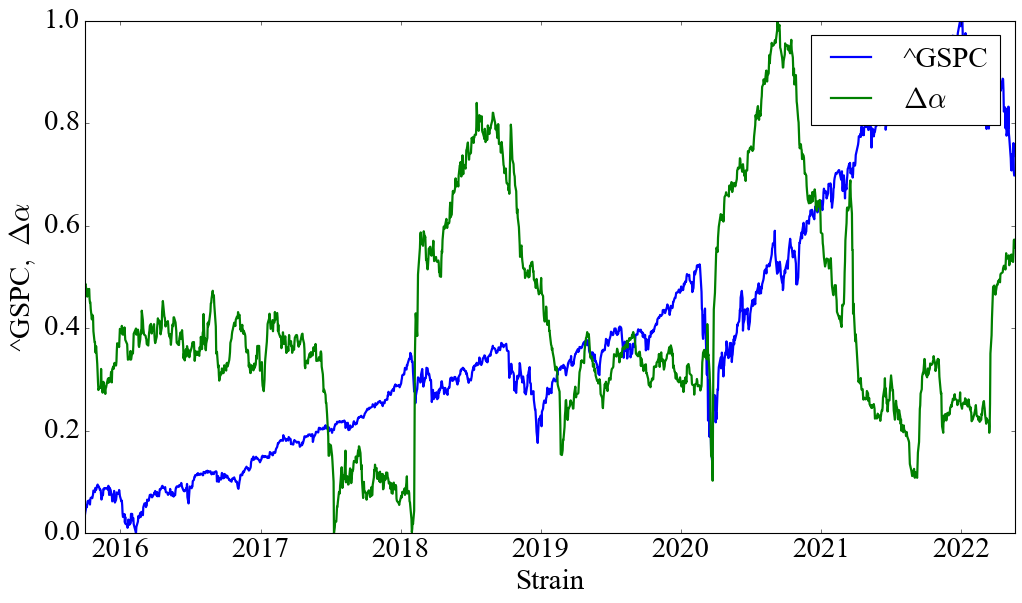

In [542]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_1.index[window:length:tstep], scaled_for_graph_1[window:length:tstep], label=fr"{symbol_1_for_graph.split('.')[0]}")
ax.plot(time_ser_1.index[window:length:tstep], scaled_delta_alpha, label=r"$\Delta\alpha$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_1_for_graph.split('.')[0]}$,$ $\Delta\alpha$")

plt.savefig(f"mfdcca_delta_alpha_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.jpg")
plt.show()

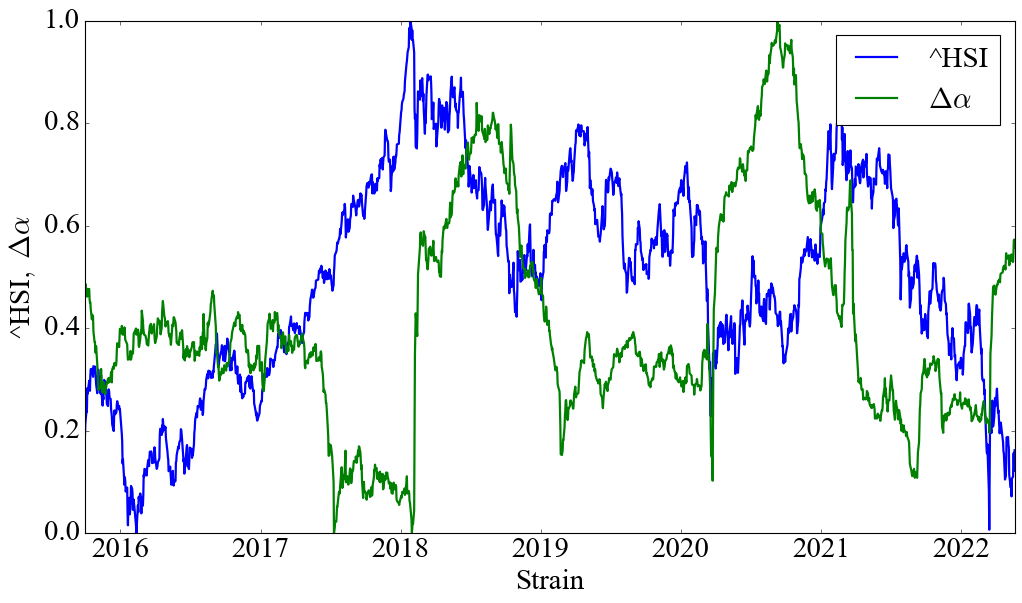

In [543]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_2.index[window:length:tstep], scaled_for_graph_2[window:length:tstep], label=fr"{symbol_2_for_graph.split('.')[0]}")
ax.plot(time_ser_2.index[window:length:tstep], scaled_delta_alpha, label=r"$\Delta\alpha$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_2_for_graph.split('.')[0]}$,$ $\Delta\alpha$")

plt.savefig(f"mfdcca_delta_alpha_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.jpg")
plt.show()

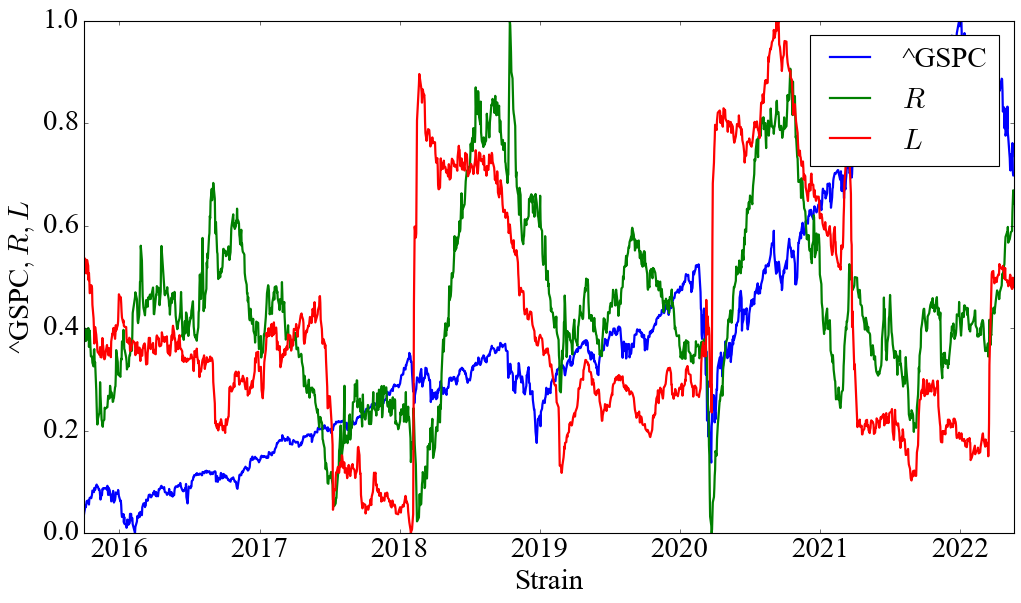

In [544]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_1.index[window:length:tstep], scaled_for_graph_1[window:length:tstep], label=fr"{symbol_1_for_graph.split('.')[0]}")
ax.plot(time_ser_1.index[window:length:tstep], scaled_delta_alpha_right, label=r"$R$")
ax.plot(time_ser_1.index[window:length:tstep], scaled_delta_alpha_left, label=r"$L$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_1_for_graph.split('.')[0]}$,$" + r"$R, L$")

plt.savefig(f"mfdcca_delta_alpha_left_right_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.jpg", bbox_inches="tight")
plt.show()

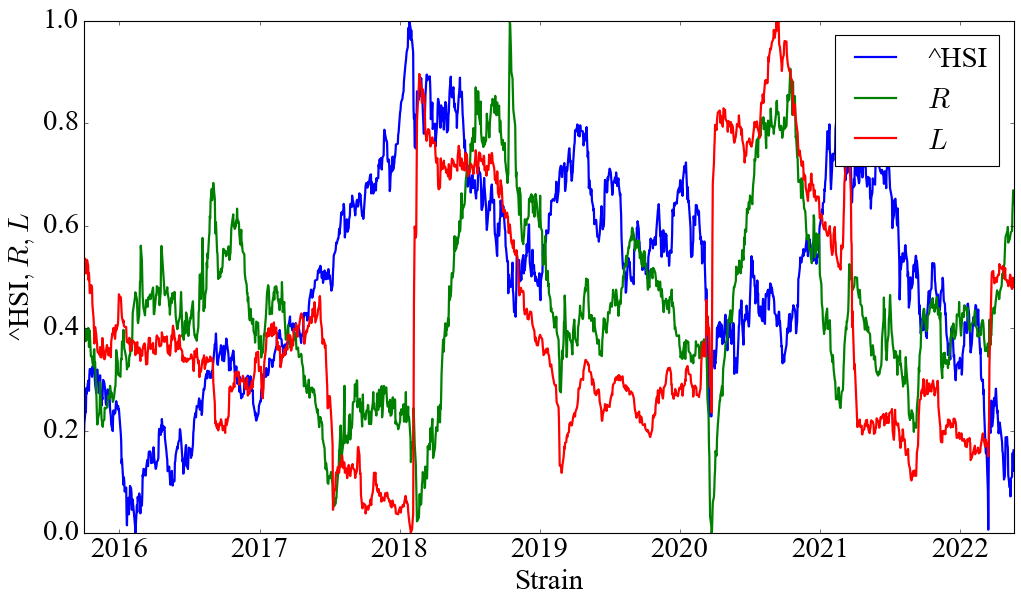

In [545]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_2.index[window:length:tstep], scaled_for_graph_2[window:length:tstep], label=fr"{symbol_2_for_graph.split('.')[0]}")
ax.plot(time_ser_2.index[window:length:tstep], scaled_delta_alpha_right, label=r"$R$")
ax.plot(time_ser_2.index[window:length:tstep], scaled_delta_alpha_left, label=r"$L$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_2_for_graph.split('.')[0]}$,$" + r"$R, L$")

plt.savefig(f"mfdcca_delta_alpha_left_right_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.jpg", bbox_inches="tight")
plt.show()

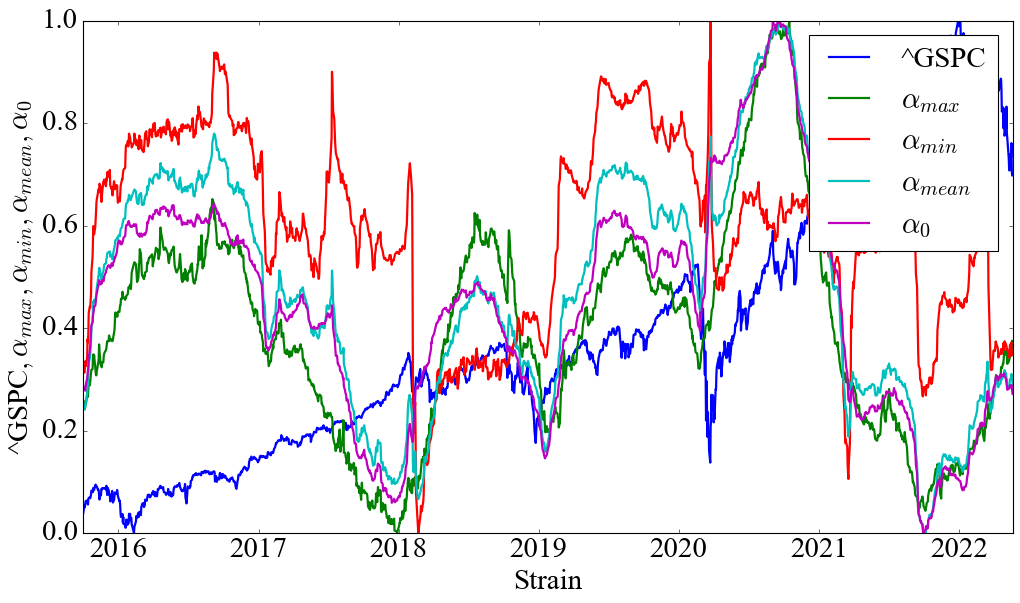

In [546]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_1.index[window:length:tstep], scaled_for_graph_1[window:length:tstep], label=fr"{symbol_1_for_graph.split('.')[0]}")
ax.plot(time_ser_1.index[window:length:tstep], scaled_max_alpha, label=r"$\alpha_{max}$")
ax.plot(time_ser_1.index[window:length:tstep], scaled_min_alpha, label=r"$\alpha_{min}$")
ax.plot(time_ser_1.index[window:length:tstep], scaled_mean_alpha, label=r"$\alpha_{mean}$")
ax.plot(time_ser_1.index[window:length:tstep], scaled_alpha_zero, label=r"$\alpha_{0}$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_1_for_graph.split('.')[0]}$,$" + r"$\alpha_{max}, \alpha_{min}, \alpha_{mean}, \alpha_{0}$")

plt.savefig(f"mfdcca_alpha_min_max_mean_zero_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.jpg", bbox_inches="tight")
plt.show()

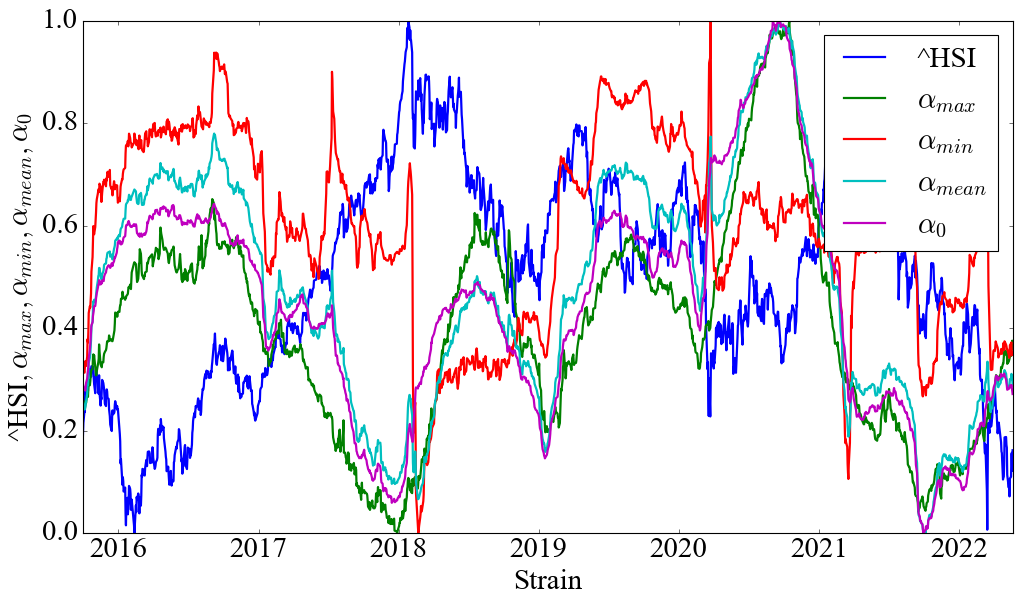

In [547]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_2.index[window:length:tstep], scaled_for_graph_2[window:length:tstep], label=fr"{symbol_2_for_graph.split('.')[0]}")
ax.plot(time_ser_2.index[window:length:tstep], scaled_max_alpha, label=r"$\alpha_{max}$")
ax.plot(time_ser_2.index[window:length:tstep], scaled_min_alpha, label=r"$\alpha_{min}$")
ax.plot(time_ser_2.index[window:length:tstep], scaled_mean_alpha, label=r"$\alpha_{mean}$")
ax.plot(time_ser_2.index[window:length:tstep], scaled_alpha_zero, label=r"$\alpha_{0}$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_2_for_graph.split('.')[0]}$,$" + r"$\alpha_{max}, \alpha_{min}, \alpha_{mean}, \alpha_{0}$")

plt.savefig(f"mfdcca_alpha_min_max_mean_zero_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.jpg", bbox_inches="tight")
plt.show()

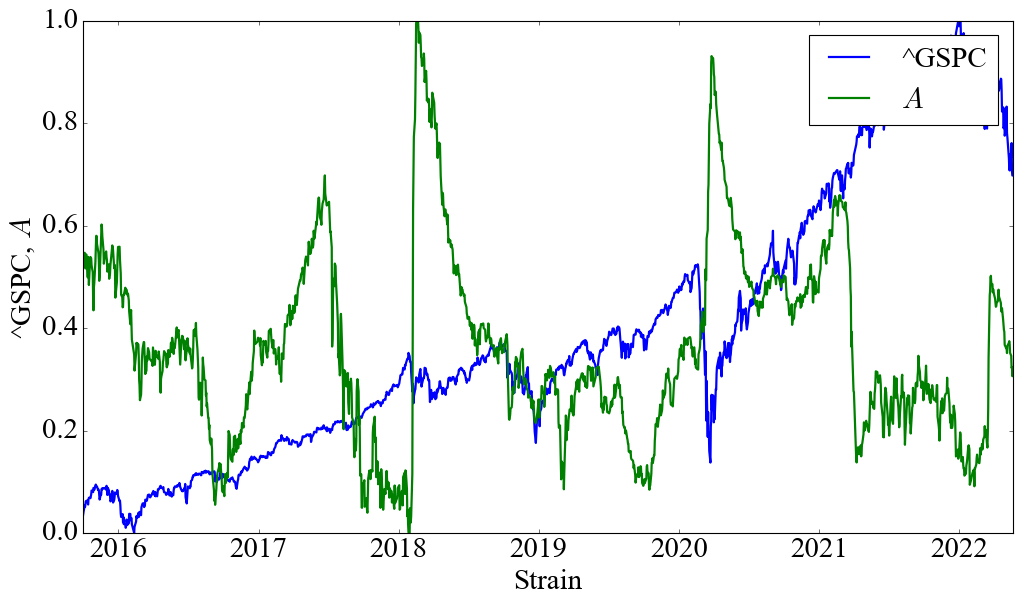

In [548]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_1.index[window:length:tstep], scaled_for_graph_1[window:length:tstep], label=fr"{symbol_1_for_graph.split('.')[0]}")
ax.plot(time_ser_1.index[window:length:tstep], scaled_assymetry, label=r"$A$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_1_for_graph.split('.')[0]}, " + fr"$A$")

plt.savefig(f"mfdcca_A_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.jpg", bbox_inches="tight")
plt.show()

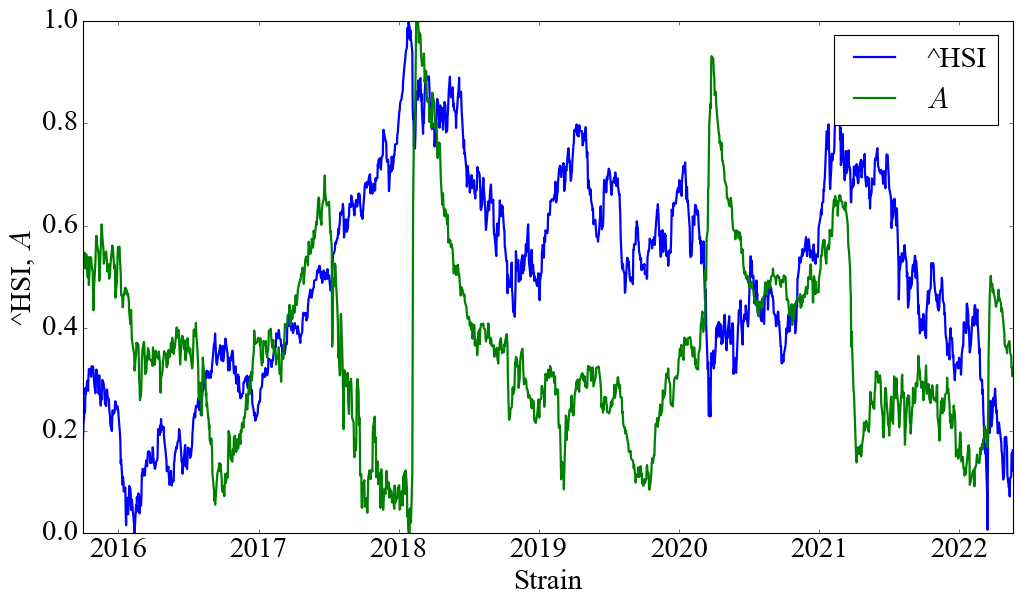

In [549]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_2.index[window:length:tstep], scaled_for_graph_2[window:length:tstep], label=fr"{symbol_2_for_graph.split('.')[0]}")
ax.plot(time_ser_2.index[window:length:tstep], scaled_assymetry, label=r"$A$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_2_for_graph.split('.')[0]}, " + fr"$A$")

plt.savefig(f"mfdcca_A_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.jpg", bbox_inches="tight")
plt.show()

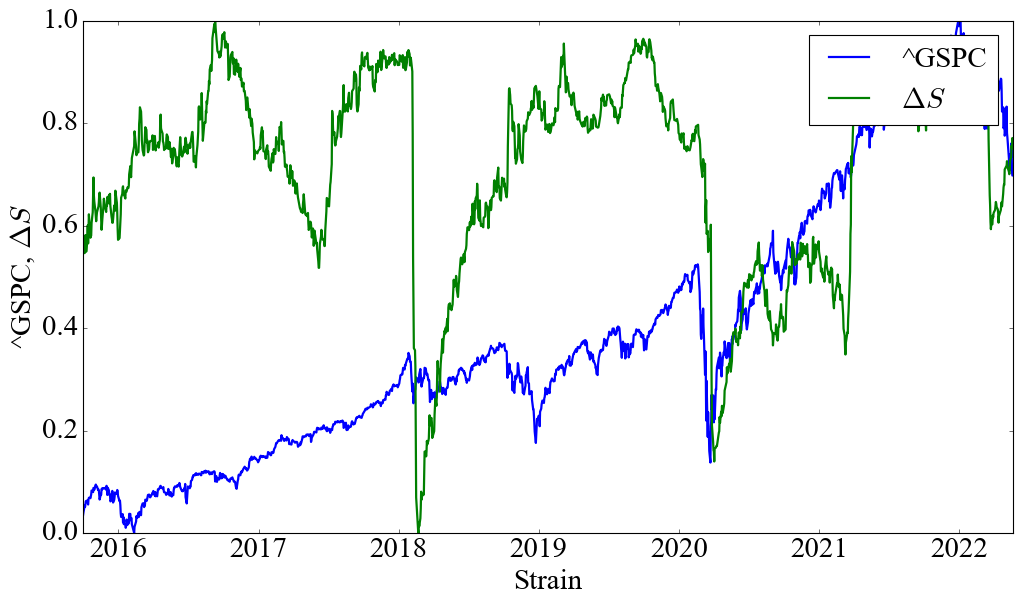

In [550]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_1.index[window:length:tstep], scaled_for_graph_1[window:length:tstep], label=fr"{symbol_1_for_graph.split('.')[0]}")
ax.plot(time_ser_1.index[window:length:tstep], scaled_delta_s, label=r"$\Delta S$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_1_for_graph.split('.')[0]}, " + fr"$\Delta S$")

plt.savefig(f"mfdcca_delta_S_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.jpg", bbox_inches="tight")
plt.show()

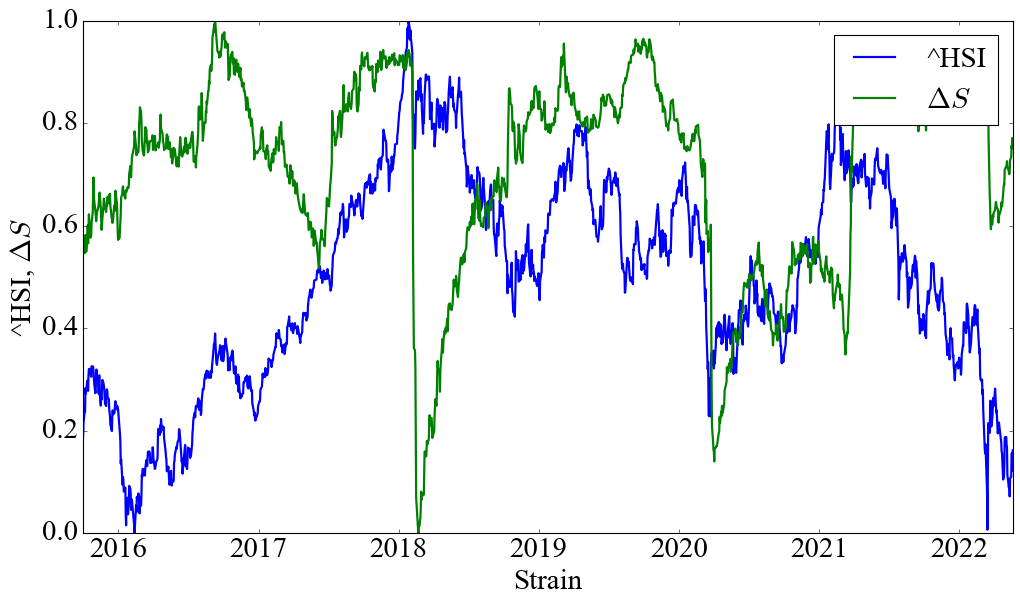

In [551]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_2.index[window:length:tstep], scaled_for_graph_2[window:length:tstep], label=fr"{symbol_2_for_graph.split('.')[0]}")
ax.plot(time_ser_2.index[window:length:tstep], scaled_delta_s, label=r"$\Delta S$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_2_for_graph.split('.')[0]}, " + fr"$\Delta S$")

plt.savefig(f"mfdcca_delta_S_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.jpg", bbox_inches="tight")
plt.show()

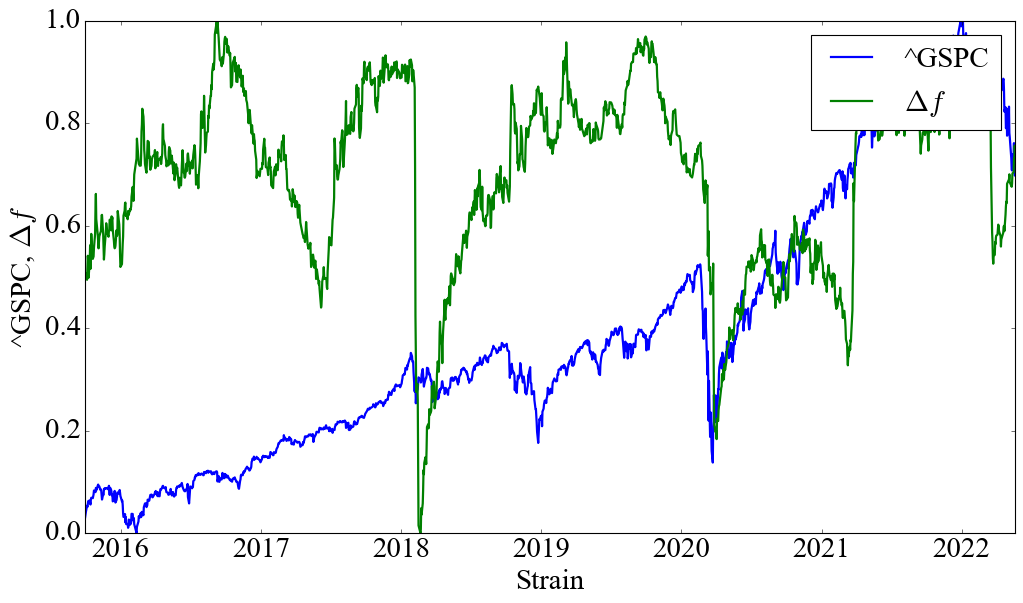

In [552]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_1.index[window:length:tstep], scaled_for_graph_1[window:length:tstep], label=fr"{symbol_1_for_graph.split('.')[0]}")
ax.plot(time_ser_1.index[window:length:tstep], scaled_spectral, label=r"$\Delta f$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_1_for_graph.split('.')[0]}, " + fr"$\Delta f$")

plt.savefig(f"mfdcca_delta_f_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.jpg", bbox_inches="tight")
plt.show()

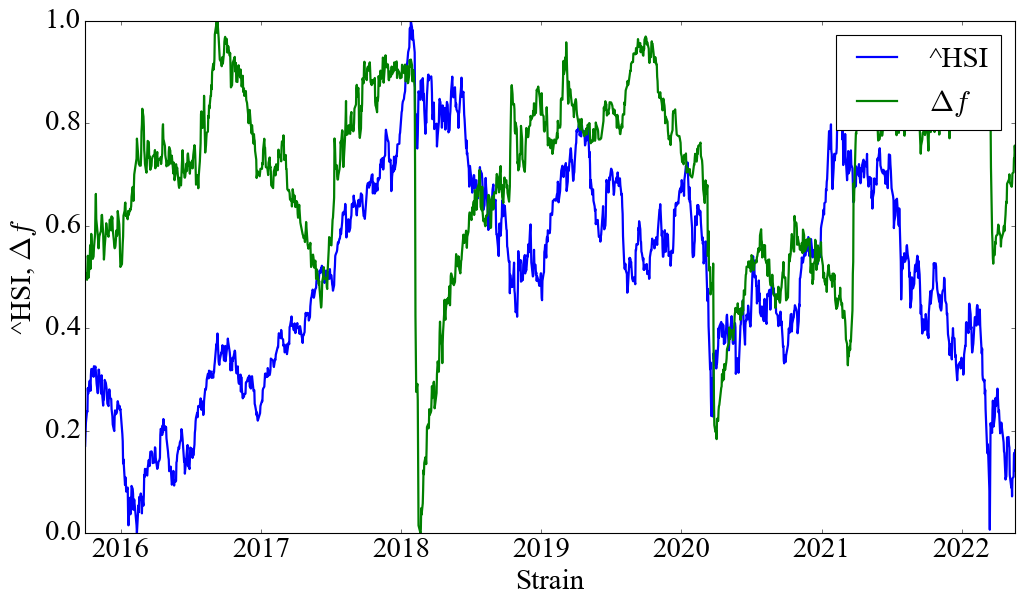

In [553]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_2.index[window:length:tstep], scaled_for_graph_2[window:length:tstep], label=fr"{symbol_2_for_graph.split('.')[0]}")
ax.plot(time_ser_2.index[window:length:tstep], scaled_spectral, label=r"$\Delta f$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_2_for_graph.split('.')[0]}, " + fr"$\Delta f$")

plt.savefig(f"mfdcca_delta_f_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.jpg", bbox_inches="tight")
plt.show()

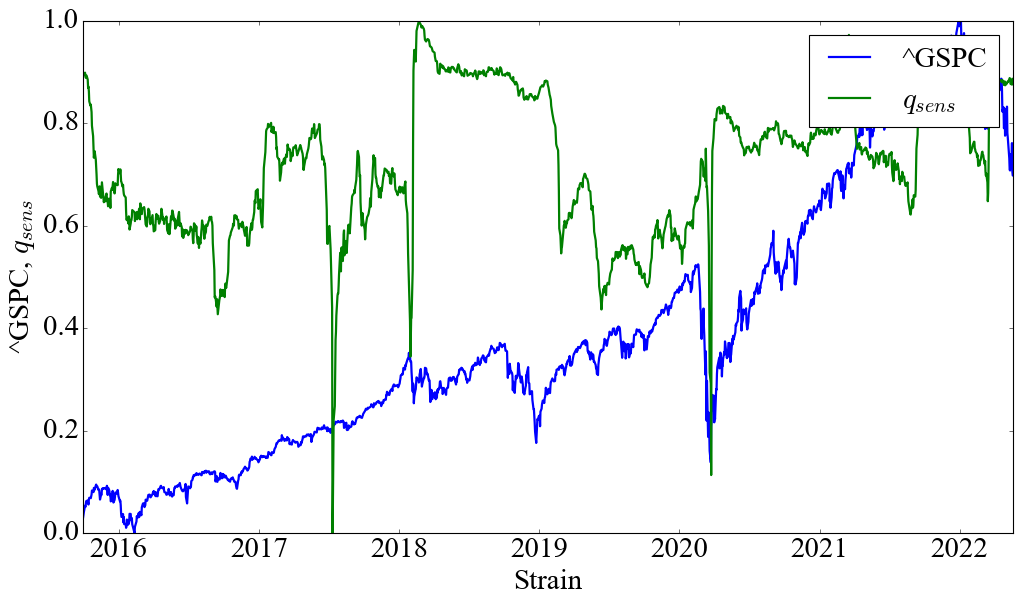

In [554]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_1.index[window:length:tstep], scaled_for_graph_1[window:length:tstep], label=fr"{symbol_1_for_graph.split('.')[0]}")
ax.plot(time_ser_1.index[window:length:tstep], scaled_q_sens, label=r"$q_{sens}$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_1_for_graph.split('.')[0]}, " + r"$q_{sens}$")

plt.savefig(f"mfdcca_q_sens_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.jpg", bbox_inches="tight")
plt.show()

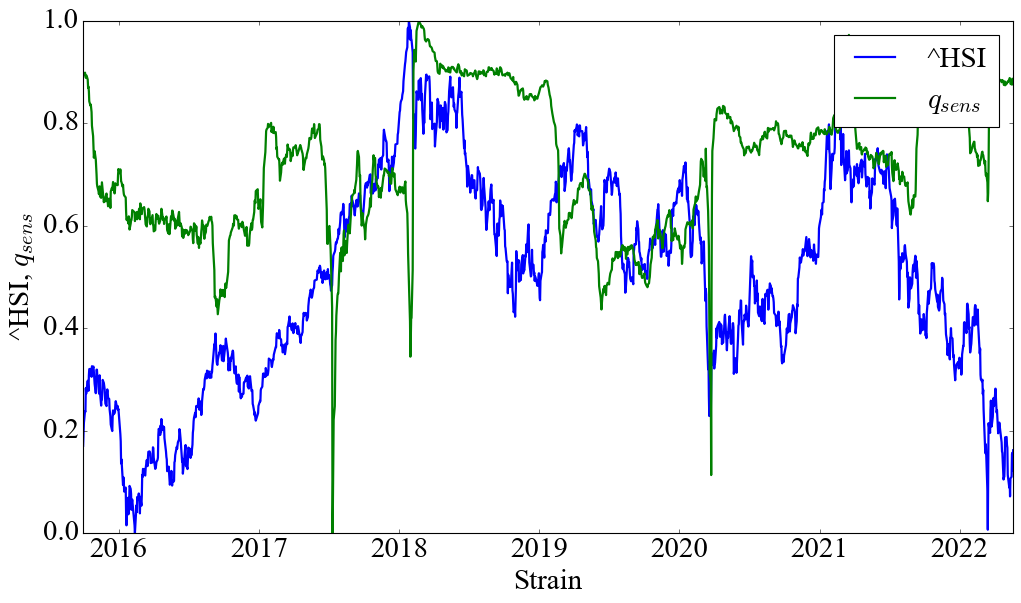

In [555]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(time_ser_2.index[window:length:tstep], scaled_for_graph_2[window:length:tstep], label=fr"{symbol_2_for_graph.split('.')[0]}")
ax.plot(time_ser_2.index[window:length:tstep], scaled_q_sens, label=r"$q_{sens}$")

ax.legend()

ax.set_xlabel("Strain")
ax.set_ylabel(fr"{symbol_2_for_graph.split('.')[0]}, " + r"$q_{sens}$")

plt.savefig(f"mfdcca_q_sens_{symbol_1.split('.')[0]}_{symbol_2.split('.')[0]}_{order}_{q_min}_{q_max}_{q_inc}_{window}_{tstep}.jpg", bbox_inches="tight")
plt.show()